TFT: A Case Study of Equinnax, Challenger Players, & Predictions

Gathering Data for Equinnax

In [1]:
import time
import itertools
import requests
import pandas as pd
import regex as re
import replace
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
from sklearn.linear_model import LinearRegression
from IPython.display import display
pd.options.mode.chained_assignment = None

In [489]:
#extracting puuid from riot API json file.
response_puuid_personal = requests.get("https://na1.api.riotgames.com/tft/summoner/v1/summoners/by-name/Equinnax?api_key=RGAPI-c1644d64-aa39-4692-a77f-bccdbe885a57")
response_puuid_personal_json = response_puuid_personal.json()
puuid = response_puuid_personal_json['puuid']

#get matchid from puuid.
url_1 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/"+ puuid +"/ids?start=0&count=200&api_key=RGAPI-c1644d64-aa39-4692-a77f-bccdbe885a57"
response_matchid_personal = requests.get(url_1)
response_matchid_personal_json = response_matchid_personal.json()

#set empty dataframe to append future dataframes onto.
all_matchinfo = pd.DataFrame()

#use for loop in order to call all personal game info data from riot API, combine each single match info into database of all matches.
for x in response_matchid_personal_json:
    url_2 = "https://americas.api.riotgames.com/tft/match/v1/matches/"+ x +"?api_key=RGAPI-c1644d64-aa39-4692-a77f-bccdbe885a57"
    response_matchinfo = requests.get(url_2)
    response_matchinfo_json = response_matchinfo.json()
    for i in range(7):
        if response_matchinfo_json['metadata']['participants'][i] == puuid:
            index = i
            break
    my_data = pd.json_normalize(response_matchinfo_json['info']['participants'][index])
    game_info = pd.json_normalize(response_matchinfo_json['info'])[['game_length','tft_set_number','tft_game_type']]
    single_personal_matchinfo = pd.concat([game_info, my_data], axis = 1)
    all_matchinfo = pd.concat([single_personal_matchinfo, all_matchinfo])
    time.sleep(1)

#display all of my personal matchinfo, drop columns that are unneeded
display(all_matchinfo)

,game_length,tft_set_number,tft_game_type,augments,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,companion.content_ID,companion.skin_ID,companion.species
0,2153.207764,7,standard,"[TFT7_Augment_UrfsGrabBag1, TFT6_Augment_Pando...",1,35,8,3,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2071.111816,131,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
0,2242.354004,7,standard,"[TFT6_Augment_RichGetRicher, TFT6_Augment_Jewe...",12,38,8,1,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2234.209961,164,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
0,2200.366211,7,standard,"[TFT7_Augment_SwiftshotEmblem, TFT6_Augment_Ba...",2,31,9,4,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1948.593750,109,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Thresh', 'itemNames': ...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
0,2392.322754,7,standard,"[TFT6_Augment_CyberneticImplants2, TFT6_Augmen...",5,31,8,5,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1952.001099,86,"[{'name': 'Set7_Bruiser', 'num_units': 1, 'sty...","[{'character_id': 'TFT7_Gnar', 'itemNames': ['...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
0,2202.555908,7,standard,"[TFT7_Augment_MysticTrait, TFT6_Augment_Jewele...",6,34,8,4,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2135.910156,90,"[{'name': 'Set7_Astral', 'num_units': 9, 'styl...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2168.984863,7,standard,"[TFT7_Augment_FirstAidKit2, TFT7_Augment_Pando...",1,30,8,5,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1832.491455,81,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
0,2219.367676,7,standard,"[TFT7_Augment_CannoneerHotShot, TFT6_Augment_P...",0,38,8,2,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2211.191895,144,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
0,2432.942871,7,standard,"[TFT7_Augment_RagewingTrait, TFT7_Augment_Rage...",5,41,8,1,4,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2424.735107,249,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
0,1321.844116,7,turbo,"[TFT7_Augment_PandorasBench, TFT6_Augment_Cele...",10,17,8,8,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1017.922791,10,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Sett', 'itemNames': ['...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog


In [2]:
#save dataframe to local drive
#all_matchinfo.to_csv(r'C:\Users\justi\OneDrive\Desktop\Data Science\TFT Case Study\all_match_data.csv', index = False)
all_matchinfo_og = pd.read_csv(r'C:\Users\justi\OneDrive\Desktop\Data Science\TFT Case Study\all_match_data.csv')
all_matchinfo_og

,game_length,tft_set_number,tft_game_type,augments,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,companion.content_ID,companion.skin_ID,companion.species
0,2153.207764,7,standard,"['TFT7_Augment_UrfsGrabBag1', 'TFT6_Augment_Pa...",1,35,8,3,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2071.111816,131,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
1,2242.354004,7,standard,"['TFT6_Augment_RichGetRicher', 'TFT6_Augment_J...",12,38,8,1,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2234.209961,164,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
2,2200.366211,7,standard,"['TFT7_Augment_SwiftshotEmblem', 'TFT6_Augment...",2,31,9,4,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1948.593750,109,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Thresh', 'itemNames': ...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
3,2392.322754,7,standard,"['TFT6_Augment_CyberneticImplants2', 'TFT6_Aug...",5,31,8,5,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1952.001099,86,"[{'name': 'Set7_Bruiser', 'num_units': 1, 'sty...","[{'character_id': 'TFT7_Gnar', 'itemNames': ['...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
4,2202.555908,7,standard,"['TFT7_Augment_MysticTrait', 'TFT6_Augment_Jew...",6,34,8,4,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2135.910156,90,"[{'name': 'Set7_Astral', 'num_units': 9, 'styl...","[{'character_id': 'TFT7_Vladimir', 'itemNames'...",7bf593ed-62d3-4f7f-abd8-e558c646af68,26,PetQiyanaDog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2168.984863,7,standard,"['TFT7_Augment_FirstAidKit2', 'TFT7_Augment_Pa...",1,30,8,5,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1832.491455,81,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
196,2219.367676,7,standard,"['TFT7_Augment_CannoneerHotShot', 'TFT6_Augmen...",0,38,8,2,1,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2211.191895,144,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
197,2432.942871,7,standard,"['TFT7_Augment_RagewingTrait', 'TFT7_Augment_R...",5,41,8,1,4,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,2424.735107,249,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog
198,1321.844116,7,turbo,"['TFT7_Augment_PandorasBench', 'TFT6_Augment_C...",10,17,8,8,0,UX4YRb6iT8sx7fUjiX9B9w-FnCbNMM4EsN_fyJSC4Xh2at...,1017.922791,10,"[{'name': 'Set7_Cavalier', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Sett', 'itemNames': ['...",42f00aaf-97d5-4c5a-a0e1-c904818a74a8,27,PetQiyanaDog


Gathering Data for Rank 1 Player Dataset

In [88]:
#extracting puuid from riot API json file.
response_chal_puuid = requests.get("https://na1.api.riotgames.com/tft/summoner/v1/summoners/by-name/c9%20k3soju?api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571")
response_chal_puuid_json = response_chal_puuid.json()
chal_puuid = response_chal_puuid_json['puuid']

#get matchid from puuid.
url_3 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + chal_puuid + "/ids?start=0&count=200&api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"
url_5 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + chal_puuid + "/ids?start=200&count=200&api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"
url_6 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + chal_puuid + "/ids?start=400&count=200&api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"
url_7 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + chal_puuid + "/ids?start=600&count=200&api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"
url_8 = "https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/" + chal_puuid + "/ids?start=800&count=200&api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"

response_matchid_chal_1 = requests.get(url_3)
response_matchid_chal_2 = requests.get(url_5)
response_matchid_chal_3 = requests.get(url_6)
response_matchid_chal_4 = requests.get(url_7)
response_matchid_chal_5 = requests.get(url_8)
response_matchid_chal_1_json = response_matchid_chal_1.json()
response_matchid_chal_2_json = response_matchid_chal_2.json()
response_matchid_chal_3_json = response_matchid_chal_3.json()
response_matchid_chal_4_json = response_matchid_chal_4.json()
response_matchid_chal_5_json = response_matchid_chal_5.json()

response_matchid_chal_json = response_matchid_chal_1_json + response_matchid_chal_2_json + response_matchid_chal_3_json + response_matchid_chal_4_json + response_matchid_chal_5_json

#set empty dataframe to append future dataframes onto.
all_chal_matchinfo = pd.DataFrame()

#use for loop in order to call all personal game info data from riot API, combine each single match info into database of all matches.
for x in response_matchid_chal_json:
    url_4 = "https://americas.api.riotgames.com/tft/match/v1/matches/"+ x +"?api_key=RGAPI-43070b17-dd55-41f4-a818-567049d48571"
    response_chal_matchinfo = requests.get(url_4)
    response_chal_matchinfo_json = response_chal_matchinfo.json()
    for i in range(7):
        if response_chal_matchinfo_json['metadata']['participants'][i] == chal_puuid:
            chal_index = i 
            break
    chal_data = pd.json_normalize(response_chal_matchinfo_json['info']['participants'][chal_index])
    chal_game_info = pd.json_normalize(response_chal_matchinfo_json['info'])[['game_length','tft_set_number','tft_game_type']]
    single_chal_matchinfo = pd.concat([chal_game_info, chal_data], axis = 1)
    all_chal_matchinfo = pd.concat([single_chal_matchinfo, all_chal_matchinfo])
    time.sleep(1)

#display all of my personal matchinfo, drop columns that are unneeded
display(all_chal_matchinfo)


,game_length,tft_set_number,tft_game_type,augments,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,companion.content_ID,companion.skin_ID,companion.species
0,2364.392090,6,standard,"[TFT6_Augment_CelestialBlessing1, TFT6_Augment...",2,23,8,7,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1295.841431,11,"[{'name': 'Set6_Bodyguard', 'num_units': 2, 's...","[{'character_id': 'TFT6_Quinn', 'itemNames': [...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
0,1989.023926,6,standard,"[TFT6_Augment_CelestialBlessing1, TFT6_Augment...",4,28,9,7,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1623.605225,82,"[{'name': 'Set6_Bodyguard', 'num_units': 4, 's...","[{'character_id': 'TFT6_Camille', 'itemNames':...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
0,1999.094238,6,standard,"[TFT6_Augment_TrueTwos, TFT6_Augment_Component...",11,34,9,1,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1990.782837,154,"[{'name': 'Set6_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Blitzcrank', 'itemName...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
0,2179.855957,6,standard,"[TFT6_Augment_CyberneticImplants2, TFT6_Augmen...",21,38,9,1,2,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2171.678467,227,"[{'name': 'Set6_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Ezreal', 'itemNames': ...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
0,2124.681396,6,standard,"[TFT6_Augment_ScholarLearning, TFT6_Augment_Th...",17,30,7,6,0,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1756.302612,80,"[{'name': 'Set6_Arcanist', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Brand', 'itemNames': [...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,2624.955566,7,standard,"[TFT6_Augment_PortableForge, TFT6_Augment_Forc...",1,42,9,2,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2616.805176,139,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
0,2520.847656,7,standard,"[TFT6_Augment_CelestialBlessing2, TFT7_Augment...",2,44,9,1,3,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2512.664551,238,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Thresh', 'itemNames': ...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
0,2498.804688,7,standard,"[TFT6_Augment_BandOfThieves2, TFT6_Augment_Cyb...",7,38,9,3,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2377.262695,168,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
0,2636.621582,7,standard,"[TFT6_Augment_TinyTitans, TFT6_Augment_Cyberne...",5,40,9,3,2,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2406.912109,94,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Sejuani', 'itemNames':...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill


In [3]:
#save dataframe to local drive
#all_chal_matchinfo.to_csv(r'C:\Users\justi\OneDrive\Desktop\Data Science\TFT Case Study\all_chal_match_data.csv', index = False)
all_chal_matchinfo_og = pd.read_csv(r'C:\Users\justi\OneDrive\Desktop\Data Science\TFT Case Study\all_chal_match_data.csv')
all_chal_matchinfo_og

,game_length,tft_set_number,tft_game_type,augments,gold_left,last_round,level,placement,players_eliminated,puuid,time_eliminated,total_damage_to_players,traits,units,companion.content_ID,companion.skin_ID,companion.species
0,2364.392090,6,standard,"['TFT6_Augment_CelestialBlessing1', 'TFT6_Augm...",2,23,8,7,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1295.841431,11,"[{'name': 'Set6_Bodyguard', 'num_units': 2, 's...","[{'character_id': 'TFT6_Quinn', 'itemNames': [...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
1,1989.023926,6,standard,"['TFT6_Augment_CelestialBlessing1', 'TFT6_Augm...",4,28,9,7,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1623.605225,82,"[{'name': 'Set6_Bodyguard', 'num_units': 4, 's...","[{'character_id': 'TFT6_Camille', 'itemNames':...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
2,1999.094238,6,standard,"['TFT6_Augment_TrueTwos', 'TFT6_Augment_Compon...",11,34,9,1,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1990.782837,154,"[{'name': 'Set6_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Blitzcrank', 'itemName...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
3,2179.855957,6,standard,"['TFT6_Augment_CyberneticImplants2', 'TFT6_Aug...",21,38,9,1,2,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2171.678467,227,"[{'name': 'Set6_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Ezreal', 'itemNames': ...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
4,2124.681396,6,standard,"['TFT6_Augment_ScholarLearning', 'TFT6_Augment...",17,30,7,6,0,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,1756.302612,80,"[{'name': 'Set6_Arcanist', 'num_units': 1, 'st...","[{'character_id': 'TFT6_Brand', 'itemNames': [...",51308483-ce6c-49e7-9727-aa300827016f,1,PetMiner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2624.955566,7,standard,"['TFT6_Augment_PortableForge', 'TFT6_Augment_F...",1,42,9,2,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2616.805176,139,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Gnar', 'itemNames': []...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
996,2520.847656,7,standard,"['TFT6_Augment_CelestialBlessing2', 'TFT7_Augm...",2,44,9,1,3,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2512.664551,238,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Thresh', 'itemNames': ...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
997,2498.804688,7,standard,"['TFT6_Augment_BandOfThieves2', 'TFT6_Augment_...",7,38,9,3,1,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2377.262695,168,"[{'name': 'Set7_Bard', 'num_units': 1, 'style'...","[{'character_id': 'TFT7_Tristana', 'itemNames'...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill
998,2636.621582,7,standard,"['TFT6_Augment_TinyTitans', 'TFT6_Augment_Cybe...",5,40,9,3,2,uiH59P9JMhw91hZL6NNVoou58vHZ043ZLOnGgz28PBQ0mI...,2406.912109,94,"[{'name': 'Set7_Assassin', 'num_units': 1, 'st...","[{'character_id': 'TFT7_Sejuani', 'itemNames':...",b6a7b533-6c34-4ce6-86cf-4a249e093ae0,28,PetDuckbill


Data Formatting & Cleaning (Equinnax Dataset)

In [4]:
all_matchinfo1 = all_matchinfo_og.copy()

#Check the size of the dataset, datatypes in each column, if there are any NULL values
summary = all_matchinfo1.info()
print(summary)

#set game length number equal to minutes instead of seconds, easier to read and analyze.
all_matchinfo1['game_length'] = (all_matchinfo1['game_length'])/60
all_matchinfo1['time_eliminated'] = (all_matchinfo1['time_eliminated'])/60

#ensure that all games that are within this database are of set 7.
all_matchinfo1 = all_matchinfo1.loc[all_matchinfo1['tft_set_number'] == 7 ]\

#make values within augments easier to read, split augments up into their individual columns, drop original column.
augment_1 = []
augment_2 = []
augment_3 = []
all_match_aug = []

for i in range(len(all_matchinfo1)):
    regex_aug = "Augment_(\w+)."
    match_aug = re.findall(regex_aug, all_matchinfo1['augments'][i])
    all_match_aug.append(match_aug)
    if len(match_aug) == 3:
        augment_1.append(match_aug[0])
        augment_2.append(match_aug[1])
        augment_3.append(match_aug[2])
    elif len(match_aug) == 2:
        augment_1.append(match_aug[0])
        augment_2.append(match_aug[1])
        augment_3.append('None')
    elif len(match_aug) == 1:
        augment_1.append(match_aug[0])
        augment_2.append('None')
        augment_3.append('None')
    elif len(match_aug) == 0:
        augment_1.append('None')
        augment_2.append('None')
        augment_3.append('None')

all_matchinfo1['augment_1'] = augment_1
all_matchinfo1['augment_2'] = augment_2
all_matchinfo1['augment_3'] = augment_3
all_matchinfo1['all_augments'] = all_match_aug
all_matchinfo1 = all_matchinfo1.drop(['augments', 'gold_left', 'last_round', 'level', 'companion.skin_ID', 'companion.species', 'puuid', 'companion.content_ID'], axis = 1)

#make values within traits column easier to read, make a list of all traits, cut out all other unnecessary information.
for i in range(len(all_matchinfo1)):
    match_trait = []
    regex_trait_info = "Set\d_(\w+)."
    regex_active = "tier_current...(\d)"
    match_active = re.findall(regex_active, all_matchinfo1['traits'][i])
    for h in range(len(match_active)):
        match_active[h] = int(match_active[h])
    for g in range(len(match_active)):
        if match_active[g] > 0:
            single_trait = re.findall(regex_trait_info, all_matchinfo1['traits'][i])[g]
            match_trait.append(single_trait)
    all_matchinfo1.at[i,'traits'] = match_trait

#make values within units column easier to read, make a list of units played, cut out all other unnecessary information, save unit name.
for i in range(len(all_matchinfo1)):
    match_unit = []
    regex_unit_info = "character_id....TFT\d_(\w+)"   
    units = re.findall(regex_unit_info, all_matchinfo1['units'][i])
    all_matchinfo1.at[i,'units'] = units

#Some of the units have the wrong names, such as "DragonGreen" and "DragonPurple", we'll replace all of those with the right unit name.
dragon_names = {'DragonPurple':'Syfen', 'DragonGreen':'ShiOhYu', 'DragonBlue':'Daeja', 'DragonGold':'Idas', 'TrainerDragon': 'Nomsy'}
for i in range(len(all_matchinfo1)):
    all_matchinfo1['units'][i] =[dragon_names.get(n,n) for n in all_matchinfo1['units'][i]]
    

#ensure that the tft game type is standard, turbo is a different game mode that is much different than standard.
all_matchinfo1 = all_matchinfo1[all_matchinfo1['tft_game_type'] != "turbo"].reset_index(drop = True)

all_matchinfo1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_length              200 non-null    float64
 1   tft_set_number           200 non-null    int64  
 2   tft_game_type            200 non-null    object 
 3   augments                 200 non-null    object 
 4   gold_left                200 non-null    int64  
 5   last_round               200 non-null    int64  
 6   level                    200 non-null    int64  
 7   placement                200 non-null    int64  
 8   players_eliminated       200 non-null    int64  
 9   puuid                    200 non-null    object 
 10  time_eliminated          200 non-null    float64
 11  total_damage_to_players  200 non-null    int64  
 12  traits                   200 non-null    object 
 13  units                    200 non-null    object 
 14  companion.content_ID     2

,game_length,tft_set_number,tft_game_type,placement,players_eliminated,time_eliminated,total_damage_to_players,traits,units,augment_1,augment_2,augment_3,all_augments
0,35.886796,7,standard,3,1,34.518530,131,"[Dragon, Dragonmancer, Jade, Ragewing, Shapesh...","[Gnar, Swain, Anivia, Hecarim, Neeko, Xayah, Y...",UrfsGrabBag1,PandorasItems,RagewingScorch,"[UrfsGrabBag1, PandorasItems, RagewingScorch]"
1,37.372567,7,standard,1,0,37.236833,164,"[Dragon, Dragonmancer, Jade, Ragewing, Shapesh...","[Gnar, Ashe, Swain, Hecarim, Neeko, Xayah, Shy...",RichGetRicher,JeweledLotus,RagewingScorch,"[RichGetRicher, JeweledLotus, RagewingScorch]"
2,36.672770,7,standard,4,1,32.476562,109,"[Bard, Dragon, Dragonmancer, Guild, Tempest, W...","[Thresh, Ashe, Swain, Ornn, Yasuo, Bard, AoShi...",SwiftshotEmblem,BandOfThieves2,PortableForge,"[SwiftshotEmblem, BandOfThieves2, PortableForge]"
3,39.872046,7,standard,5,1,32.533352,86,"[Dragon, Evoker, Jade, Shapeshifter, Starcalle...","[Gnar, Lulu, Neeko, Ornn, Sona, AoShin, Soraka]",CyberneticImplants2,RichGetRicherPlus,CyberneticShell2,"[CyberneticImplants2, RichGetRicherPlus, Cyber..."
4,36.709265,7,standard,4,1,35.598503,90,"[Astral, Bruiser, Dragon, Mystic]","[Vladimir, Skarner, Nidalee, Nami, Varus, Illa...",MysticTrait,JeweledLotus,BlueBattery2,"[MysticTrait, JeweledLotus, BlueBattery2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,40.010852,7,standard,5,1,33.233362,71,"[Bard, Dragonmancer, Guild, Jade, Ragewing, Sh...","[Sett, Gnar, Ashe, Swain, Hecarim, Neeko, Zoe,...",Featherweights1,JeweledLotus,ComponentGrabBag,"[Featherweights1, JeweledLotus, ComponentGrabBag]"
193,40.613961,7,standard,1,1,40.477039,183,"[Assassin, Dragon, Guild, Jade, Shapeshifter, ...","[Gnar, Twitch, Talon, Neeko, ShiOhYu, Pyke, So...",RichGetRicher,SecondWind1,PortableForge,"[RichGetRicher, SecondWind1, PortableForge]"
194,36.149748,7,standard,5,0,30.541524,81,"[Bard, Bruiser, Cannoneer, Dragon, Evoker, Gui...","[Tristana, Lulu, Sylas, Corki, Syfen, Sona, Ba...",FirstAidKit2,PandorasBench,CelestialBlessing3,"[FirstAidKit2, PandorasBench, CelestialBlessing3]"
195,36.989461,7,standard,2,1,36.853198,144,"[Bruiser, Cannoneer, Dragon, Evoker, Revel, Tr...","[Tristana, Lulu, Sylas, Corki, Syfen, Sona, Py...",CannoneerHotShot,PandorasItems,Weakspot,"[CannoneerHotShot, PandorasItems, Weakspot]"


Data Cleaning & Formatting (Rank 1 Player Dataset)

In [5]:
all_chal_matchinfo1 = all_chal_matchinfo_og.copy()

#Check the size of the dataset, datatypes in each column, if there are any NULL values
summary = all_chal_matchinfo1.info()
print(summary)

#set game length number equal to minutes instead of seconds, easier to read and analyze.
all_chal_matchinfo1['game_length'] = (all_chal_matchinfo1['game_length'])/60
all_chal_matchinfo1['time_eliminated'] = (all_chal_matchinfo1['time_eliminated'])/60

#ensure that all games that are within this database are of set 7.
all_chal_matchinfo1 = all_chal_matchinfo1.loc[all_chal_matchinfo1['tft_set_number'] == 7 ].reset_index(drop = True)


#make values within augments easier to read, split augments up into their individual columns, drop original column.
augment_1 = []
augment_2 = []
augment_3 = []
all_chal_match_aug = []

for i in range(len(all_chal_matchinfo1)):
    chal_regex_aug = "Augment_(\w+)."
    chal_match_aug = re.findall(chal_regex_aug, all_chal_matchinfo1['augments'][i])
    all_chal_match_aug.append(chal_match_aug)
    if len(chal_match_aug) == 3:
        augment_1.append(chal_match_aug[0])
        augment_2.append(chal_match_aug[1])
        augment_3.append(chal_match_aug[2])
    elif len(chal_match_aug) == 2:
        augment_1.append(chal_match_aug[0])
        augment_2.append(chal_match_aug[1])
        augment_3.append('None')
    elif len(chal_match_aug) == 1:
        augment_1.append(chal_match_aug[0])
        augment_2.append('None')
        augment_3.append('None')
    elif len(chal_match_aug) == 0:
        augment_1.append('None')
        augment_2.append('None')
        augment_3.append('None')

all_chal_matchinfo1['augment_1'] = augment_1
all_chal_matchinfo1['augment_2'] = augment_2
all_chal_matchinfo1['augment_3'] = augment_3
all_chal_matchinfo1['all_augments'] = all_chal_match_aug
all_chal_matchinfo1 = all_chal_matchinfo1.drop(['augments', 'gold_left', 'last_round', 'level', 'companion.skin_ID', 'companion.species', 'puuid', 'companion.content_ID'], axis = 1)

#make values within traits column easier to read, make a list of all traits, cut out all other unnecessary information.
for i in range(len(all_chal_matchinfo1)):
    match_trait = []
    chal_regex_trait_info = "Set\d_(\w+)."
    chal_regex_active = "tier_current...(\d)"
    chal_match_active = re.findall(chal_regex_active, all_chal_matchinfo1['traits'][i])
    for h in range(len(chal_match_active)):
        chal_match_active[h] = int(chal_match_active[h])
    for g in range(len(chal_match_active)):
        if chal_match_active[g] > 0:
            chal_single_trait = re.findall(chal_regex_trait_info, all_chal_matchinfo1['traits'][i])[g]
            match_trait.append(chal_single_trait)
    all_chal_matchinfo1.at[i,'traits'] = match_trait

#make values within units column easier to read, make a list of units played, cut out all other unnecessary information, save unit name.
for i in range(len(all_chal_matchinfo1)):
    match_unit = []
    chal_regex_unit_info = "character_id....TFT\d_(\w+)"   
    units = re.findall(chal_regex_unit_info, all_chal_matchinfo1['units'][i])
    all_chal_matchinfo1.at[i,'units'] = units

#Some of the units have the wrong names, such as "DragonGreen" and "DragonPurple", we'll replace all of those with the right unit name.
dragon_names = {'DragonPurple':'Syfen', 'DragonGreen':'ShiOhYu', 'DragonBlue':'Daeja', 'DragonGold':'Idas', 'TrainerDragon': 'Nomsy'}
for i in range(len(all_chal_matchinfo1)):
    all_chal_matchinfo1['units'][i] =[dragon_names.get(n,n) for n in all_chal_matchinfo1['units'][i]]
    

#ensure that the tft game type is standard, turbo is a different game mode that is much different than standard.
all_chal_matchinfo1 = all_chal_matchinfo1[all_chal_matchinfo1['tft_game_type'] != "turbo"].reset_index(drop = True)

all_chal_matchinfo1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_length              1000 non-null   float64
 1   tft_set_number           1000 non-null   int64  
 2   tft_game_type            1000 non-null   object 
 3   augments                 1000 non-null   object 
 4   gold_left                1000 non-null   int64  
 5   last_round               1000 non-null   int64  
 6   level                    1000 non-null   int64  
 7   placement                1000 non-null   int64  
 8   players_eliminated       1000 non-null   int64  
 9   puuid                    1000 non-null   object 
 10  time_eliminated          1000 non-null   float64
 11  total_damage_to_players  1000 non-null   int64  
 12  traits                   1000 non-null   object 
 13  units                    1000 non-null   object 
 14  companion.content_ID     

,game_length,tft_set_number,tft_game_type,placement,players_eliminated,time_eliminated,total_damage_to_players,traits,units,augment_1,augment_2,augment_3,all_augments
0,38.494527,7,standard,1,3,38.357800,215,"[Bard, Dragon, Guardian, Guild, Mage, Mystic, ...","[Nami, Thresh, Ornn, Idas, Zoe, Bard, AoShin]",Weakspot,DragonHorde,SunfireBoard,"[Weakspot, DragonHorde, SunfireBoard]"
1,38.244112,7,standard,7,0,22.949093,41,"[Bard, Dragon, Guild, Mage, Mystic, SpellThief...","[Nami, Shen, Ryze, Corki, Zoe, Bard, AoShin]",MakeshiftArmor3,VerdantVeil,UrfsGrabBag2,"[MakeshiftArmor3, VerdantVeil, UrfsGrabBag2]"
2,41.826314,7,standard,4,1,37.061296,135,"[Bard, Cavalier, Evoker, Guild, Mage, Mystic, ...","[Sejuani, Lillia, Lulu, Hecarim, Neeko, Sona, ...",LudensEcho1,Distancing,Meditation2,"[LudensEcho1, Distancing, Meditation2]"
3,38.124471,7,standard,7,0,24.163027,14,"[Bard, Dragon, Guild, Shimmerscale, Tempest]","[Ezreal, Hecarim, Neeko, Ornn, Idas, Yasuo, Bard]",PortableForge,TempestEmblem,AxiomArc2,"[PortableForge, TempestEmblem, AxiomArc2]"
4,42.371749,7,standard,8,0,28.664714,34,"[Bruiser, Dragon, Warrior, Whispers]","[Thresh, Elise, Olaf, Sylas, Syfen, Ornn, Yasuo]",MakeshiftArmor1,TinyTitans,BigFriend2,"[MakeshiftArmor1, TinyTitans, BigFriend2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,43.749259,7,standard,2,1,43.613420,139,"[Bard, Dragon, Guild, Jade, Mystic, Ragewing, ...","[Gnar, Lulu, Swain, Hecarim, Neeko, Xayah, Bar...",PortableForge,ForceOfNature,CelestialBlessing2,"[PortableForge, ForceOfNature, CelestialBlessi..."
957,42.014128,7,standard,1,3,41.877743,238,"[Bard, Bruiser, Dragon, Guild, Jade, Mystic, T...","[Thresh, Syfen, Ornn, ShiOhYu, Bard, AoShin]",CelestialBlessing2,DragonAlliance,Ascension,"[CelestialBlessing2, DragonAlliance, Ascension]"
958,41.646745,7,standard,3,1,39.621045,168,"[Bard, Cannoneer, Dragon, Evoker, Guardian, Gu...","[Tristana, Braum, Lulu, Corki, Sona, Idas, Yas...",BandOfThieves2,CyberneticImplants3,ComponentGrabBag,"[BandOfThieves2, CyberneticImplants3, Componen..."
959,43.943693,7,standard,3,2,40.115202,94,"[Bard, Cavalier, Dragon, Guild, Mirage, Warrior]","[Sejuani, Yone, Nunu, Hecarim, Talon, Daeja, Y...",TinyTitans,CyberneticShell2,Ascension,"[TinyTitans, CyberneticShell2, Ascension]"


Data Analysis (Equinnax Dataset)

Primary Statistics

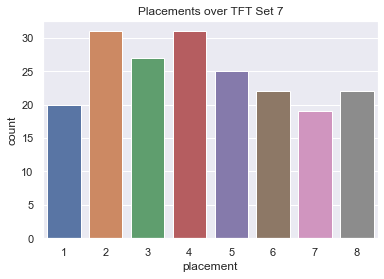

In [6]:
#distribution of placements, countplot of all placements, figure out winrate and top 4 rate
sns.set(rc = {'figure.figsize':(5,5)})
placement_countplot = sns.countplot(x = 'placement', data = all_matchinfo1).set(title = 'Placements over TFT Set 7')

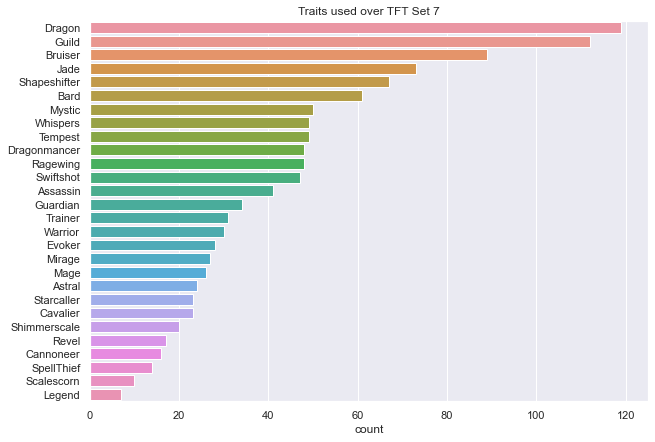

In [34]:
#distribution of traits played with, countplot of all traits played with
personal_all_traits_used =  []
for i in range(len(all_matchinfo1)):
    personal_all_traits_used.extend(all_matchinfo1['traits'][i])
trait_string = ' '.join(personal_all_traits_used)
trait_count = pd.DataFrame(data = {'traits':personal_all_traits_used})

sns.set(rc = {'figure.figsize':(10,7)})

traits_countplot = sns.countplot(y = personal_all_traits_used, orient = "h", order = trait_count['traits'].value_counts().index).set(title = 'Traits used over TFT Set 7')

(-0.5, 1499.5, 1199.5, -0.5)

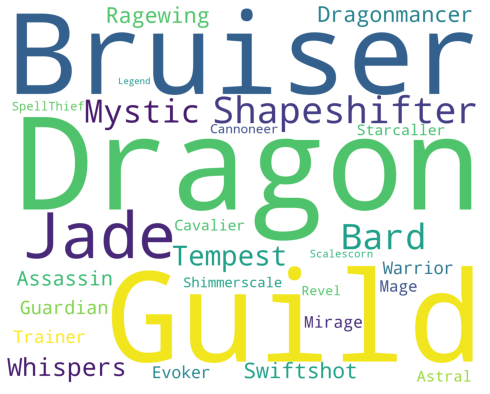

In [8]:
#wordcloud of all traits that I've played
traits_wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1200, collocations = False, stopwords = STOPWORDS).generate(trait_string)
plt.imshow(traits_wordcloud)
plt.axis("off")

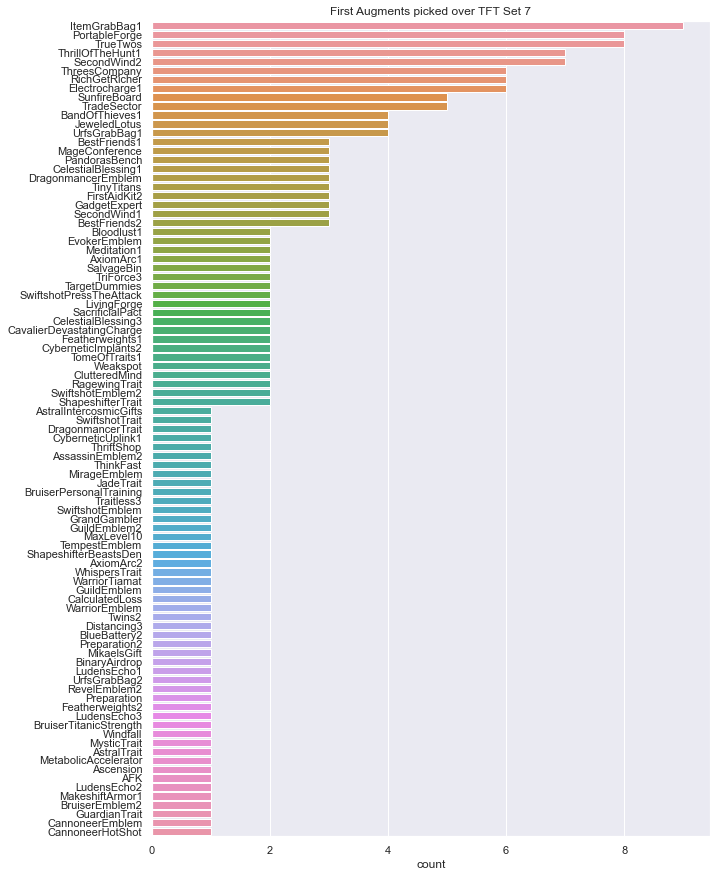

In [9]:
#distribution of augments chosen, augment 1 dist
all_augment1 = []
all_augment2 = []
all_augment3 = []
all_augments = []

for i in range(len(all_matchinfo1)):
    all_augment1.append(all_matchinfo1['augment_1'][i])
    all_augment2.append(all_matchinfo1['augment_2'][i])
    all_augment3.append(all_matchinfo1['augment_3'][i])
    all_augments = all_augment1 + all_augment2 + all_augment3

separate_augment_count = pd.DataFrame(data = {'augment_1':all_augment1, 'augment_2':all_augment2, 'augment_3':all_augment3})
all_augments_count = pd.DataFrame(data = {'augments':all_augments})

sns.set(rc = {'figure.figsize':(10,15)})
augment1_countplot = sns.countplot(y = all_augment1, orient = "h", order = separate_augment_count['augment_1'].value_counts().index).set(title = 'First Augments picked over TFT Set 7')

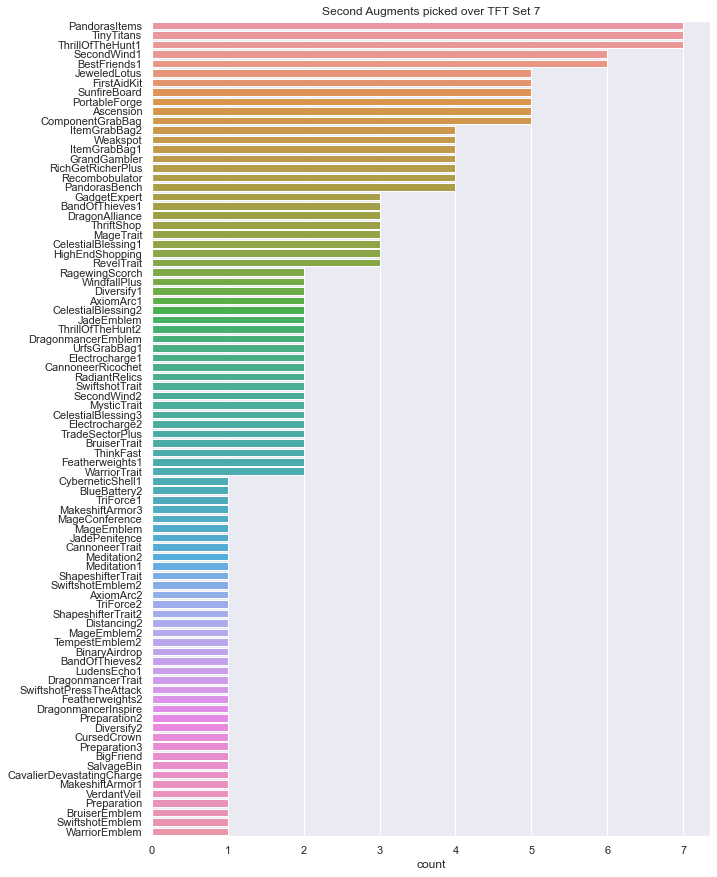

In [10]:
#augment 2 dist
sns.set(rc = {'figure.figsize':(10,15)})
augment2_countplot = sns.countplot(y = all_augment2, orient = "h", order = separate_augment_count['augment_2'].value_counts().index).set(title = 'Second Augments picked over TFT Set 7')

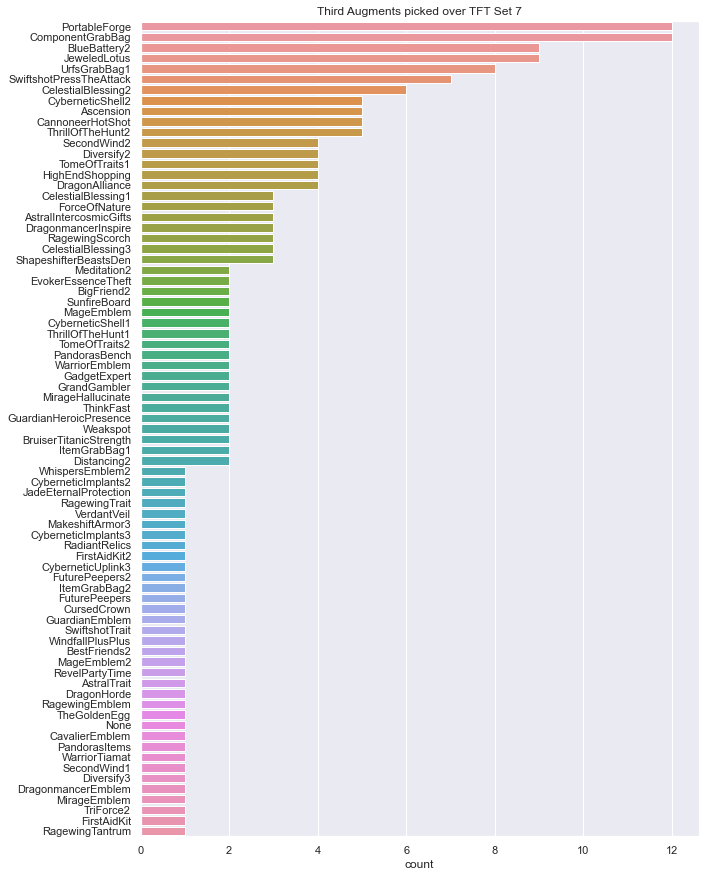

In [11]:
#augment 3 dist
sns.set(rc = {'figure.figsize':(10,15)})
augment3_countplot = sns.countplot(y = all_augment3, orient = "h", order = separate_augment_count['augment_3'].value_counts().index).set(title = 'Third Augments picked over TFT Set 7')

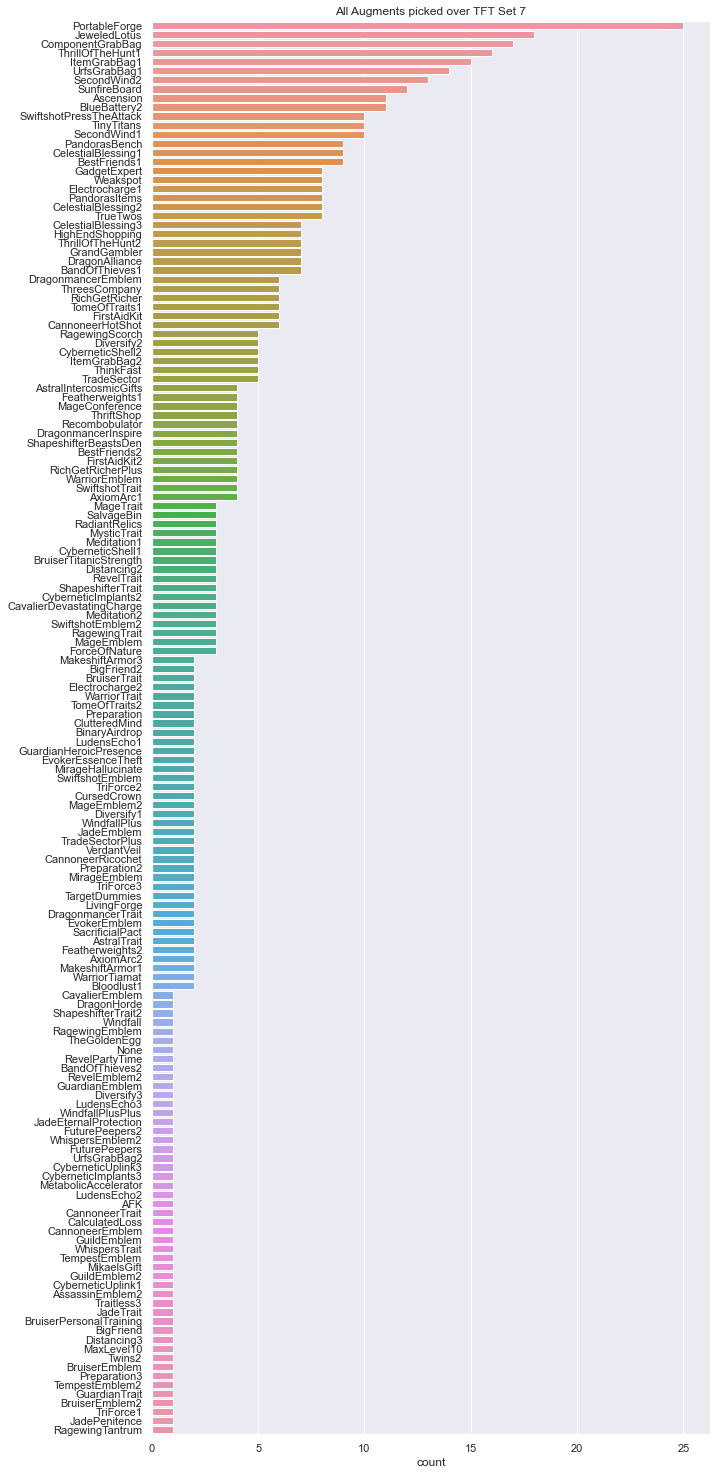

In [12]:
#all augments dist
sns.set(rc = {'figure.figsize':(10,26)})
all_augments_countplot = sns.countplot(y = all_augments, orient = "h", order = all_augments_count['augments'].value_counts().index).set(title = 'All Augments picked over TFT Set 7')

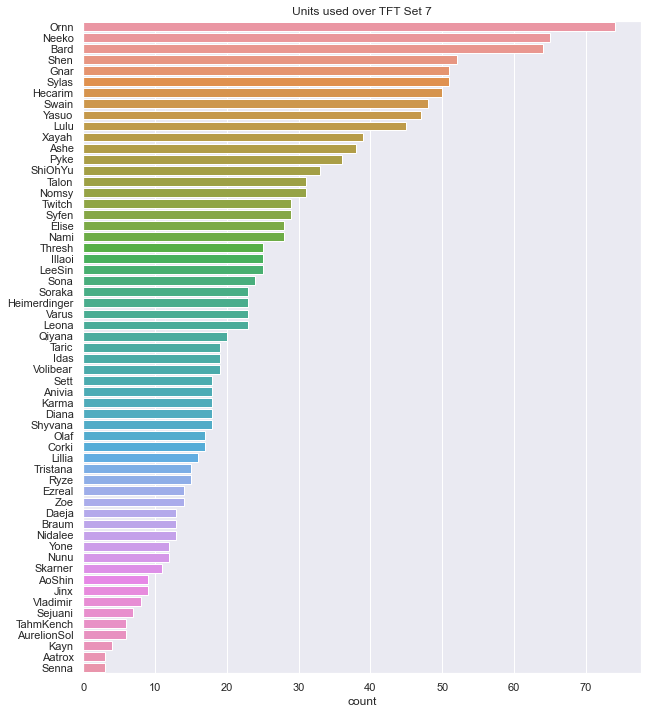

In [13]:
#distribution of units played with
all_units_used =  []
for i in range(len(all_matchinfo1)):
    all_units_used.extend(all_matchinfo1['units'][i])
units_string = ' '.join(all_units_used)
units_count = pd.DataFrame(data = {'units':all_units_used})

sns.set(rc = {'figure.figsize':(10,12)})
units_countplot = sns.countplot(y = all_units_used, orient = "h", order = units_count['units'].value_counts().index).set(title = 'Units used over TFT Set 7')

Damage Dealt Analysis:

slope: -0.03496123763944729
intercept: 7.899012437395556
corr: -0.8556588249406907
R2_value: 0.7321520246988835
p_value: 1.10249940806457e-57
std_err: 0.0015143039067301407


<function matplotlib.pyplot.show(close=None, block=None)>

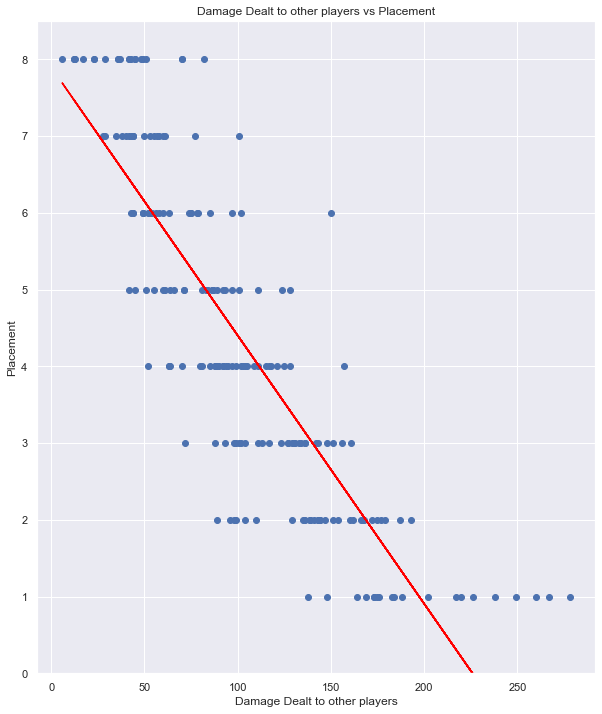

In [14]:
#scatterplot with line of best fit
damage_placement = pd.DataFrame({'placement': all_matchinfo1['placement'], 'damage_dealt': all_matchinfo1['total_damage_to_players']})

damage_dealt = damage_placement.iloc[:,1].values.reshape(-1,1)
placement = damage_placement.iloc[:,0].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(damage_dealt, placement)
y_prediction = lm.predict(damage_dealt)

#calculate slope, intercept, corr, r2 value, std err
slope, intercept, r_value, p_value, std_err = stats.linregress(damage_placement['damage_dealt'], damage_placement['placement'])
print('slope:', slope)
print('intercept:', intercept)
print('corr:', r_value)
print('R2_value:', r_value**2)
print('p_value:', p_value)
print('std_err:', std_err)

plt.scatter(damage_dealt, placement)
plt.plot(damage_dealt, y_prediction, color = 'red')
plt.ylim([0,8.5])
plt.xlabel('Damage Dealt to other players')
plt.ylabel('Placement')
plt.title('Damage Dealt to other players vs Placement')
plt.show


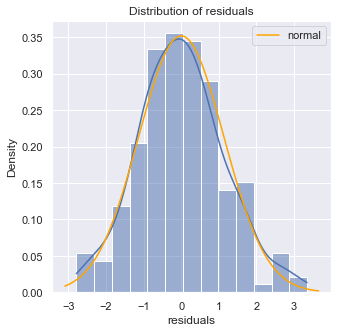

In [15]:
#residual plot
#histogram of residuals & kde of distribution
linear_model = ols('placement~damage_dealt', data = damage_placement).fit()
sns.set(rc = {'figure.figsize':(5,5)})
fig, ax = plt.subplots()
sns.histplot(x = linear_model.resid, ax = ax, stat = 'density', kde = True)
ax.set(title = "Distribution of residuals", xlabel = 'residuals')

#normal kde curve to show the difference between the two
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = stats.norm.fit(linear_model.resid)
p = stats.norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color="orange", ax=ax, label = 'normal')
plt.show()

Equinnax Traits Analysis:

In [16]:
#get all unique traits names
all_traits = ['Dragon', 'Dragonmancer', 'Jade', 'Ragewing', 'Shapeshifter', 'Swiftshot', 'Bard', 'Guild', 'Tempest', 'Whispers', 'Evoker', 'Starcaller', 'Astral', 
'Bruiser', 'Mystic', 'Cannoneer', 'Revel', 'Trainer', 'Mage', 'SpellThief', 'Assassin', 'Scalescorn', 'Warrior', 'Shimmerscale', 'Mirage', 'Guardian', 'Cavalier', 'Legend']

#create empty lists to place placement values into
Dragon = []
Dragonmancer = []
Jade = []
Ragewing = []
Shapeshifter = []
Swiftshot = []
Bard = []
Guild = []
Tempest = []
Whispers = []
Evoker = []
Starcaller = []
Astral = []
Bruiser = []
Mystic = []
Cannoneer = []
Revel = []
Trainer = []
Mage = []
SpellThief = []
Assassin = []
Scalescorn = []
Warrior = []
Shimmerscale = []
Mirage = []
Guardian = []
Cavalier = []
Legend = []

#searches the trait column, sees if the trait matches any a trait in the all_traits list, appends the placement value to the empty list correlating to the trait
for i in range(len(all_matchinfo1)):
    for j in all_traits:
        if j in all_matchinfo1['traits'][i]:
            x = all_matchinfo1['placement'][i]
            convert = eval(j)
            convert.append(x)

trait_stats = pd.DataFrame(columns = ['Trait', 'Win Percentage', 'Top 4 Percentage', 'Number of Games', 'Average Placement', 'Median Placement', 'SD of Placement'])

#calculating the win percentage, top 4 percentage, number of games, average placement, median placement, and sd of placement for all traits
for j in all_traits:
    first = 0
    two_through_four = 0
    trait_convert = eval(j)
    for h in range(len(trait_convert)):
        if trait_convert[h] == 1: 
            first = first + 1
        elif trait_convert[h] == 2 or trait_convert[h] == 3 or trait_convert[h] == 4:
            two_through_four = two_through_four + 1
    new_stats = [j, (first/len(trait_convert)), (first+two_through_four)/len(trait_convert), len(trait_convert), np.average(trait_convert), np.median(trait_convert), np.std(trait_convert)]
    trait_stats = pd.concat([trait_stats, pd.DataFrame([new_stats], columns = ['Trait', 'Win Percentage', 'Top 4 Percentage', 'Number of Games', 'Average Placement', 'Median Placement', 'SD of Placement'])])

trait_stats = trait_stats.sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage'])
display(trait_stats.round(decimals = 2))

,Trait,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,Astral,0.17,0.67,24,3.50,3.5,1.89
0,Scalescorn,0.30,0.70,10,3.50,3.5,2.16
0,Warrior,0.17,0.70,30,3.57,3.5,1.96
0,Bard,0.13,0.66,61,3.74,4.0,2.06
0,Mirage,0.07,0.67,27,3.78,4.0,1.97
0,Assassin,0.15,0.63,41,3.90,4.0,2.01
0,Whispers,0.16,0.63,49,3.92,3.0,2.21
0,Bruiser,0.11,0.62,89,3.96,4.0,2.05
0,Starcaller,0.09,0.65,23,4.00,4.0,2.25
0,Mystic,0.10,0.60,50,4.04,4.0,2.06


(0.0, 120.0)

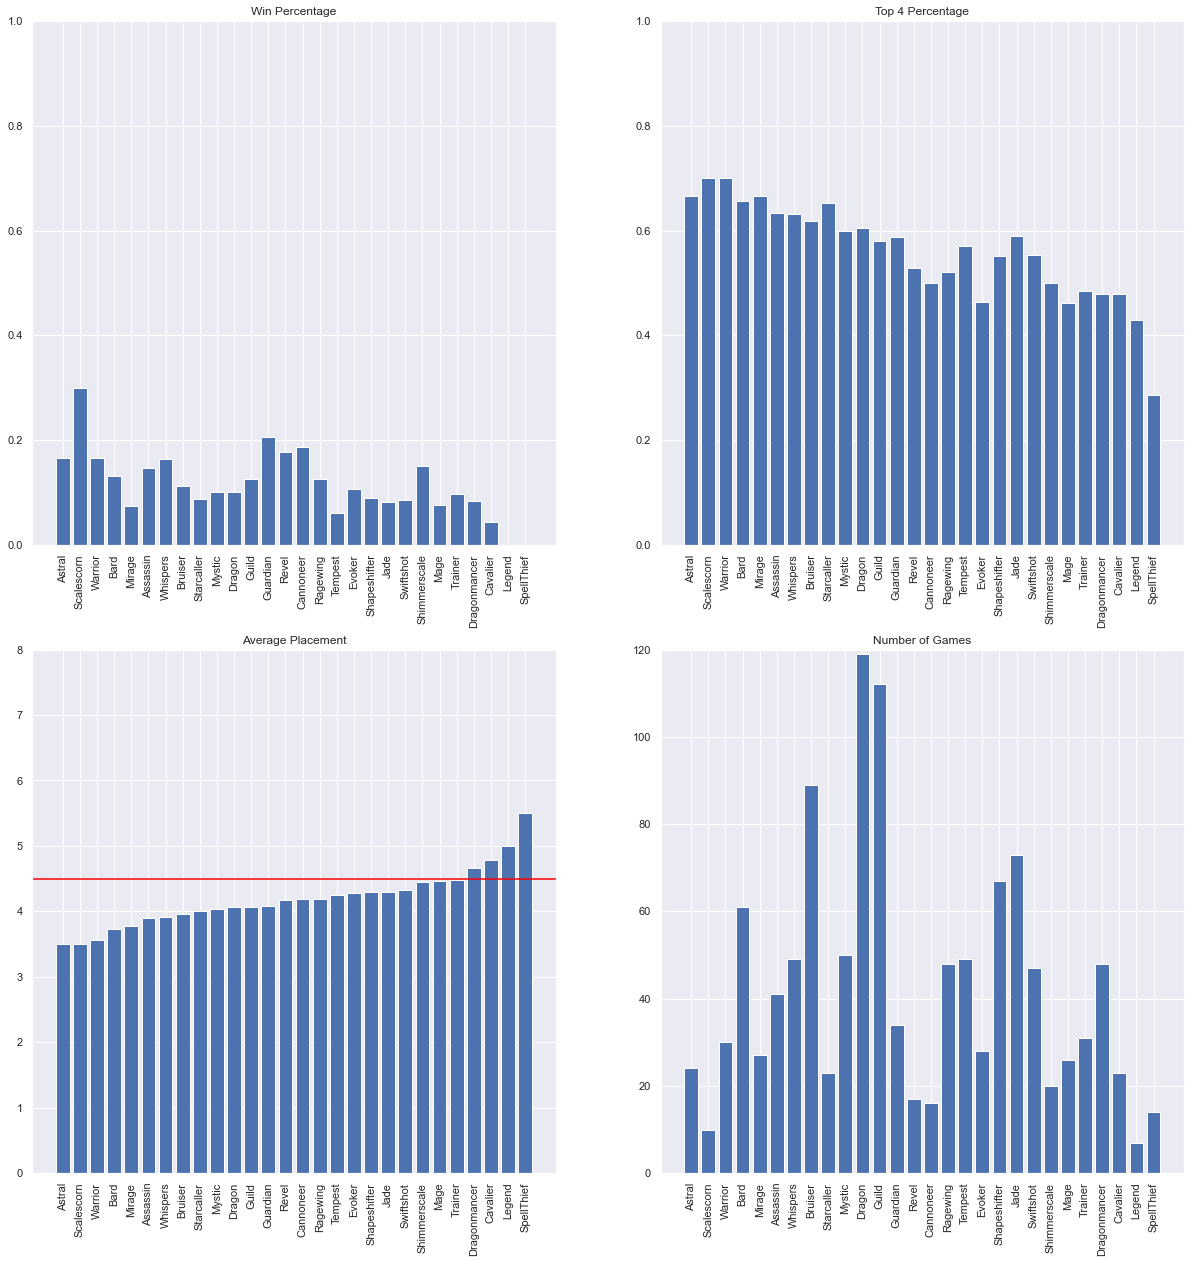

In [17]:
#bar graphs of trait win percentage, top 4 percentage, number of games, and average placement
plt.figure(figsize = (20,20))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

plt.subplot(2,2,1)
plt.title('Win Percentage')
plt.bar(x = 'Trait', height = 'Win Percentage', data = trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)

plt.subplot(2,2,2)
plt.title('Top 4 Percentage')
plt.bar(x = 'Trait', height = 'Top 4 Percentage', data = trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)


plt.subplot(2,2,3)
plt.title('Average Placement')
plt.bar(x = 'Trait', height = 'Average Placement', data = trait_stats)
plt.axhline(y = 4.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0,8)

plt.subplot(2,2,4)
plt.title('Number of Games')
plt.bar(x = 'Trait', height = 'Number of Games', data = trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,120)

In [18]:
#create empty lists to append values into
all_combo_names = []
all_combo_placements = []
all_win_percentages = []
all_top4_percentages = []
all_combo_lengths = []
all_avg_placements = []
all_median_placements = []
all_SD_placements = []

#iterate through all combinations of 3 unique traits, for each iteration go through all rows of dataframe to see if those three traits were used together in the same game, if yes, save the placement into combo_placement
#calculate stats for each combination and append onto empty lists to save the data
for comb in itertools.combinations(all_traits, 3):
    all_combo_names.append(comb)
    combo_placements = []
    first = 0
    two_through_four = 0
    for k in range(len(all_matchinfo1)):
        if all(elem in all_matchinfo1['traits'][k] for elem in comb):
            combo_placements.append(all_matchinfo1['placement'][k])
    all_combo_placements.append(combo_placements)
    for i in range(len(combo_placements)):
        if combo_placements[i] == 1:
            first = first + 1
        elif combo_placements[i] == 2 or combo_placements[i] == 3 or combo_placements[i] == 4:
            two_through_four = two_through_four + 1
    if len(combo_placements) > 0:
        all_win_percentages.append(first/len(combo_placements))
        all_top4_percentages.append((first+two_through_four)/len(combo_placements))
        all_combo_lengths.append(len(combo_placements))
        all_avg_placements.append(np.average(combo_placements))
        all_median_placements.append(np.median(combo_placements))
        all_SD_placements.append(np.std(combo_placements))
    else:
        all_win_percentages.append('NaN')
        all_top4_percentages.append('NaN')
        all_combo_lengths.append('NaN')
        all_avg_placements.append('NaN')
        all_median_placements.append('NaN')
        all_SD_placements.append('NaN')

#create dataframe for the stats created
combo_trait_stats = pd.DataFrame(data = {'Trait Combination':all_combo_names, 'Placements':all_combo_placements, 
'Win Percentage': all_win_percentages, 'Top 4 Percentage': all_top4_percentages, 'Number of Games': all_combo_lengths,
'Average Placement': all_avg_placements, 'Median Placement': all_median_placements, 'SD of Placement': all_SD_placements})

#sort and clean data, delete all rows where the combination was not used in any of the games, only keep rows where number of games is greater than 15 to ensure no outliers can skew results
combo_trait_stats = combo_trait_stats[combo_trait_stats['Average Placement'] != "NaN"]
combo_trait_stats = combo_trait_stats[combo_trait_stats['Number of Games'] > 15].sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage']).drop(columns = ['Placements']).reset_index(drop = True)

display(combo_trait_stats.round(decimals = 2))

,Trait Combination,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,"(Guild, Astral, Bruiser)",0.1875,0.75,16,3.0,2.5,1.581139
1,"(Dragon, Jade, Ragewing)",0.25,0.6875,16,3.25,2.5,2.25
2,"(Bard, Guild, Bruiser)",0.15,0.7,20,3.25,2.5,1.867485
3,"(Dragon, Dragonmancer, Ragewing)",0.25,0.6875,16,3.3125,2.5,2.31081
4,"(Dragon, Ragewing, Shapeshifter)",0.2,0.65,20,3.4,3.0,2.154066
5,"(Guild, Bruiser, Assassin)",0.181818,0.727273,22,3.454545,3.0,2.082989
6,"(Dragon, Jade, Guild)",0.137931,0.758621,29,3.482759,3.0,1.976076
7,"(Swiftshot, Guild, Tempest)",0.125,0.6875,16,3.5,3.0,1.936492
8,"(Dragon, Jade, Bard)",0.090909,0.772727,22,3.545455,3.0,1.876342
9,"(Guild, Tempest, Bruiser)",0.166667,0.611111,18,3.555556,3.0,2.060804


Equinnax Augment Analysis:

In [19]:
#list all unique augments in a single list
aug_unique = list(set(all_matchinfo1['augment_1'].to_list() + all_matchinfo1['augment_2'].to_list() + all_matchinfo1['augment_3'].to_list()))

#create empty lists to append outputs into
all_aug_names = []
all_aug_placements = []
aug_win_percentages = []
aug_top4_percentages = []
all_aug_lengths = []
aug_avg_placements = []
aug_median_placements = []
aug_SD_placements = []

#iterates through each augment in aug_unique, at each row in database it checks to see if the augment is the augment 1, augment 2, and augment 3 columns
#if it is, it saves the placement value, repeats through entire table and saves it as a list in aug_placement, list is then appended onto all_aug_placements and reset for the next augment
#calculate stats for each augment and append onto empty lists to save the data
for j in aug_unique:
    all_aug_names.append(j)
    aug_placement = []
    first = 0
    two_through_four = 0
    for i in range(len(all_matchinfo1)):
        if j in all_matchinfo1['augment_1'][i]:
            aug_placement.append(all_matchinfo1['placement'][i])
        if j in all_matchinfo1['augment_2'][i]:
            aug_placement.append(all_matchinfo1['placement'][i])
        if j in all_matchinfo1['augment_3'][i]:
            aug_placement.append(all_matchinfo1['placement'][i])
    all_aug_placements.append(aug_placement)

    for k in range(len(aug_placement)):
        if aug_placement[k] == 1:
            first = first + 1
        elif aug_placement[k] == 2 or aug_placement[k] == 3 or aug_placement[k] == 4:
            two_through_four = two_through_four + 1
    if len(aug_placement) > 0:
        aug_win_percentages.append(first/len(aug_placement))
        aug_top4_percentages.append((first+two_through_four)/len(aug_placement))
        all_aug_lengths.append(len(aug_placement))
        aug_avg_placements.append(np.average(aug_placement))
        aug_median_placements.append(np.median(aug_placement))
        aug_SD_placements.append(np.std(aug_placement))
    else:
        aug_win_percentages.append('NaN')
        aug_top4_percentages.append('NaN')
        all_aug_lengths.append('NaN')
        aug_avg_placements.append('NaN')
        aug_median_placements.append('NaN')
        aug_SD_placements.append('NaN')

#create dataframe for augment stats
aug_stats = pd.DataFrame(data = {'Augment':all_aug_names, 'Placements':all_aug_placements, 
'Win Percentage': aug_win_percentages, 'Top 4 Percentage': aug_top4_percentages, 'Number of Games': all_aug_lengths,
'Average Placement': aug_avg_placements, 'Median Placement': aug_median_placements, 'SD of Placement': aug_SD_placements})

#sort and clean data, delete all rows where the augment was not used in any of the games, only keep rows where number of games is greater than 5 to ensure no outliers can skew results
aug_stats = aug_stats[aug_stats['Average Placement'] != "NaN"]
aug_stats = aug_stats[aug_stats['Number of Games'] > 5].sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage']).drop(columns = ['Placements']).reset_index(drop = True)

display(aug_stats.round(decimals = 2))


,Augment,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,TrueTwos,0.00,1.00,8,3.00,3.0,0.87
1,CannoneerHotShot,0.17,0.67,6,3.17,3.0,1.57
2,CelestialBlessing1,0.11,0.67,9,3.33,2.0,1.83
3,SunfireBoard,0.33,0.75,12,3.33,3.0,2.29
4,TomeOfTraits1,0.17,0.83,6,3.33,3.5,1.60
5,PandorasItems,0.12,0.62,8,3.38,3.0,1.65
6,ComponentGrabBag,0.29,0.76,17,3.41,4.0,2.03
7,UrfsGrabBag1,0.21,0.64,14,3.43,3.0,1.95
8,GrandGambler,0.00,1.00,7,3.43,4.0,0.73
9,PortableForge,0.08,0.72,25,3.64,3.0,1.89


(0.0, 120.0)

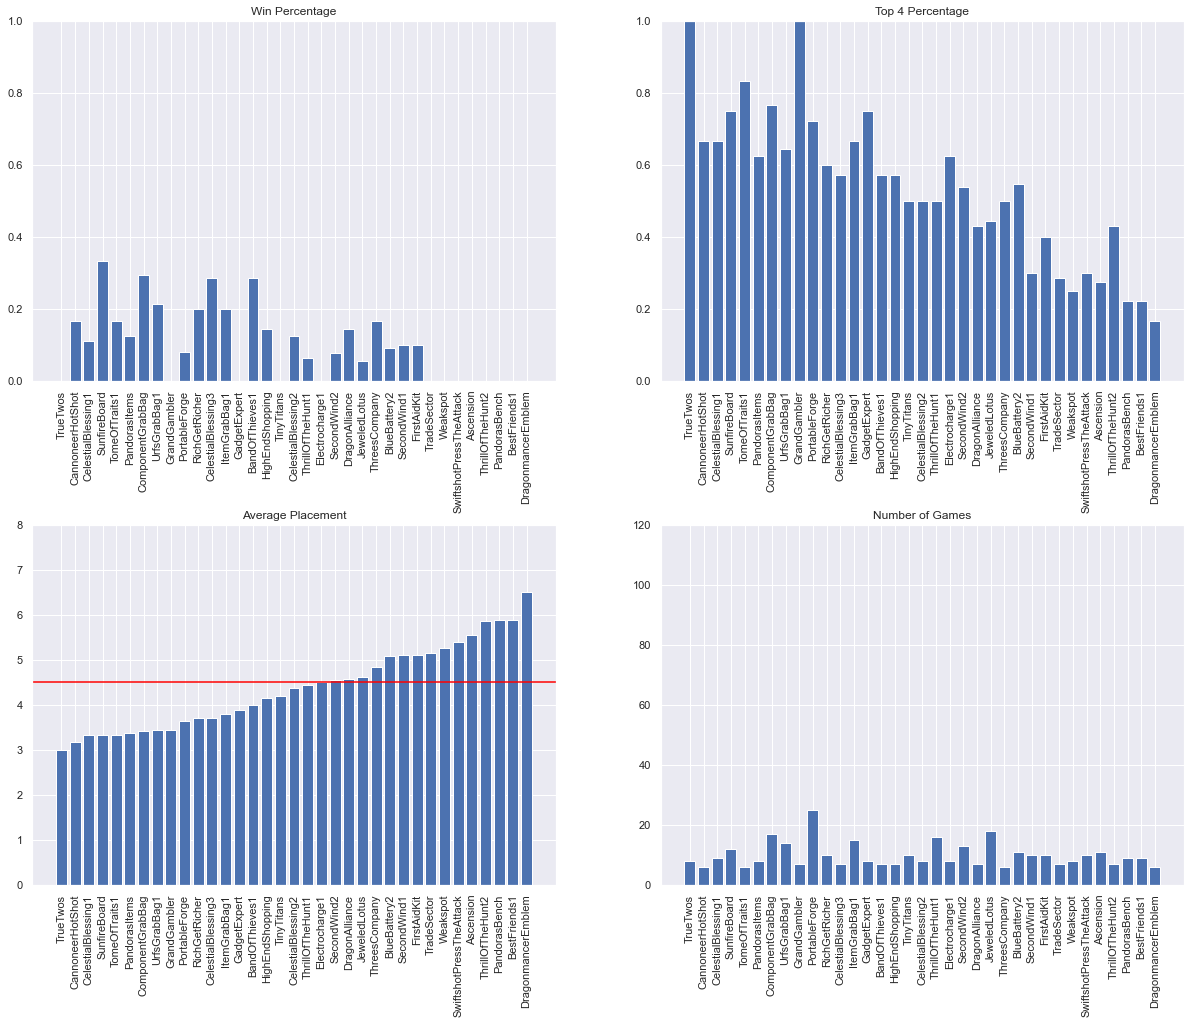

In [20]:
#bar graphs of augment win percentage, top 4 percentage, number of games, and average placement
plt.figure(figsize = (20,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.subplot(2,2,1)
plt.title('Win Percentage')
plt.bar(x = 'Augment', height = 'Win Percentage', data = aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)

plt.subplot(2,2,2)
plt.title('Top 4 Percentage')
plt.bar(x = 'Augment', height = 'Top 4 Percentage', data = aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)


plt.subplot(2,2,3)
plt.title('Average Placement')
plt.bar(x = 'Augment', height = 'Average Placement', data = aug_stats)
plt.axhline(y = 4.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0,8)

plt.subplot(2,2,4)
plt.title('Number of Games')
plt.bar(x = 'Augment', height = 'Number of Games', data = aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,120)

Data Analysis: Rank 1 Player Dataset

Primary Statistics:

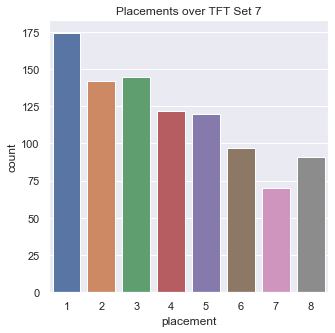

In [21]:
#distribution of challenger player placements, countplot of all placements, figure out winrate and top 4 rate
sns.set(rc = {'figure.figsize':(5,5)})
placement_countplot = sns.countplot(x = 'placement', data = all_chal_matchinfo1).set(title = 'Placements over TFT Set 7')

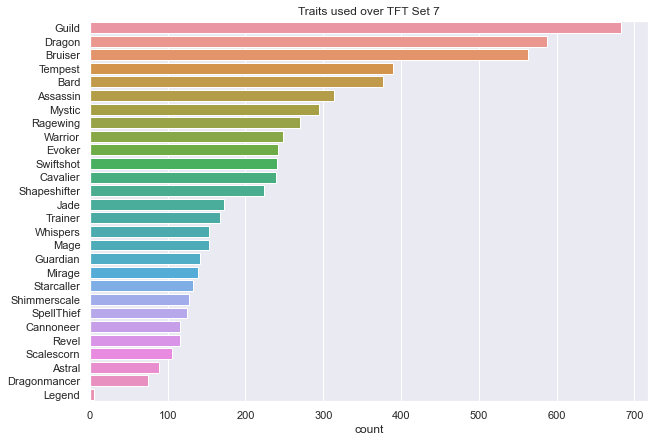

In [35]:
#distribution of traits played with, countplot of all traits played with
all_traits_used =  []
for i in range(len(all_chal_matchinfo1)):
    all_traits_used.extend(all_chal_matchinfo1['traits'][i])
trait_string = ' '.join(all_traits_used)
trait_count = pd.DataFrame(data = {'traits':all_traits_used})

sns.set(rc = {'figure.figsize':(10,7)})

traits_countplot = sns.countplot(y = all_traits_used, orient = "h", order = trait_count['traits'].value_counts().index).set(title = 'Traits used over TFT Set 7')

(-0.5, 1499.5, 1199.5, -0.5)

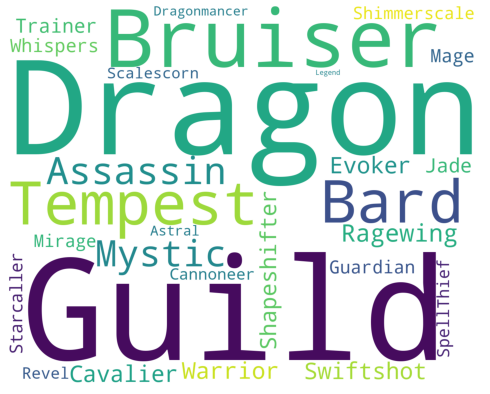

In [23]:
#wordcloud of all traits rank 1 player played with
traits_wordcloud = WordCloud(background_color = 'white', width = 1500, height = 1200, collocations = False, stopwords = STOPWORDS).generate(trait_string)
plt.imshow(traits_wordcloud)
plt.axis("off")

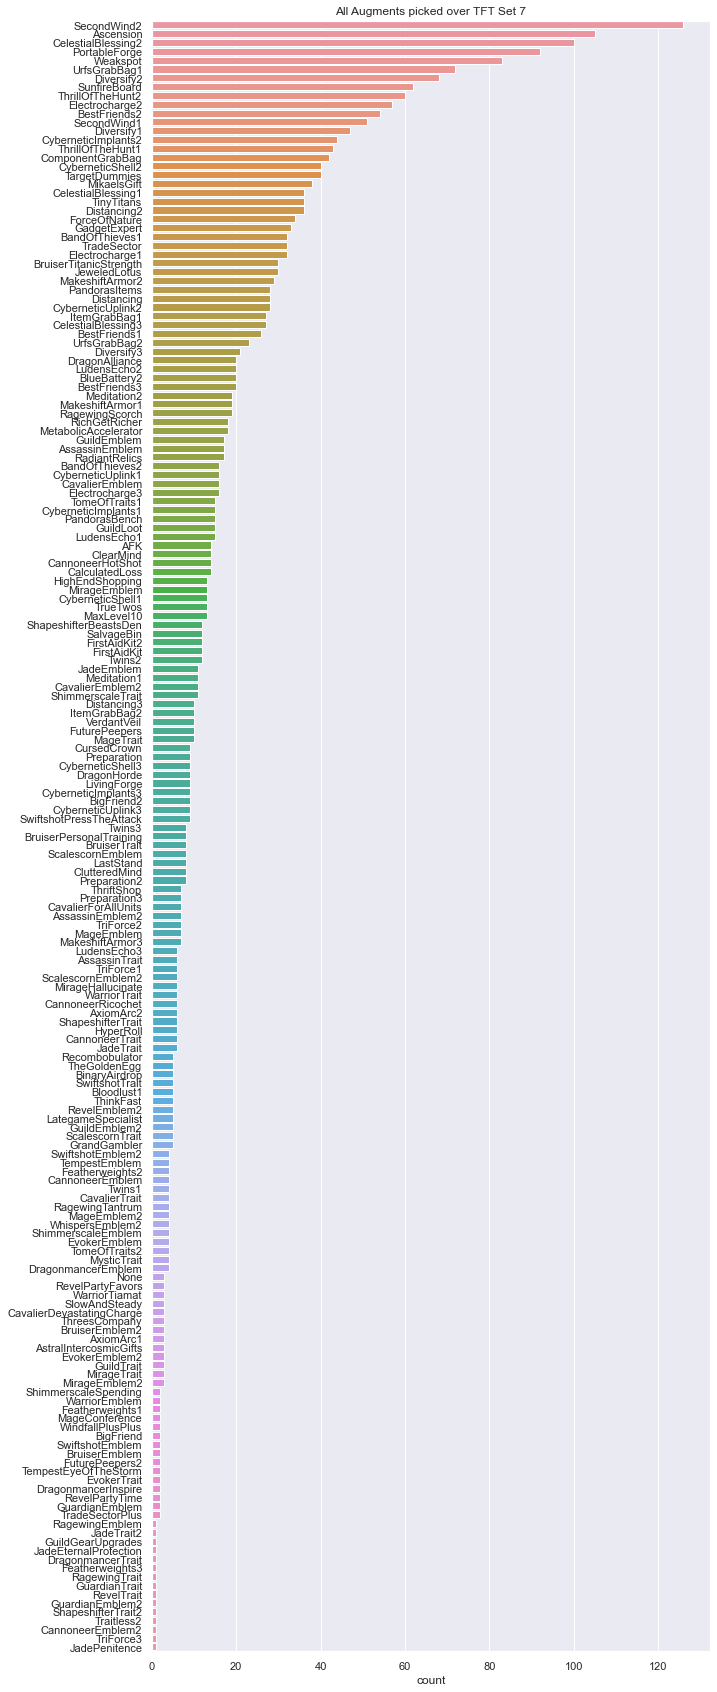

In [24]:
#distribution of all augments chosen by rank 1 player
all_chal_augment1 = []
all_chal_augment2 = []
all_chal_augment3 = []
all_chal_augments = []

for i in range(len(all_chal_matchinfo1)):
    all_chal_augment1.append(all_chal_matchinfo1['augment_1'][i])
    all_chal_augment2.append(all_chal_matchinfo1['augment_2'][i])
    all_chal_augment3.append(all_chal_matchinfo1['augment_3'][i])
    all_chal_augments = all_chal_augment1 + all_chal_augment2 + all_chal_augment3

chal_separate_augment_count = pd.DataFrame(data = {'augment_1':all_chal_augment1, 'augment_2':all_chal_augment2, 'augment_3':all_chal_augment3})
chal_all_augments_count = pd.DataFrame(data = {'augments':all_chal_augments}) 

sns.set(rc = {'figure.figsize':(10,30)})
all_chal_augments_countplot = sns.countplot(y = all_chal_augments, orient = "h", order = chal_all_augments_count['augments'].value_counts().index).set(title = 'All Augments picked over TFT Set 7')

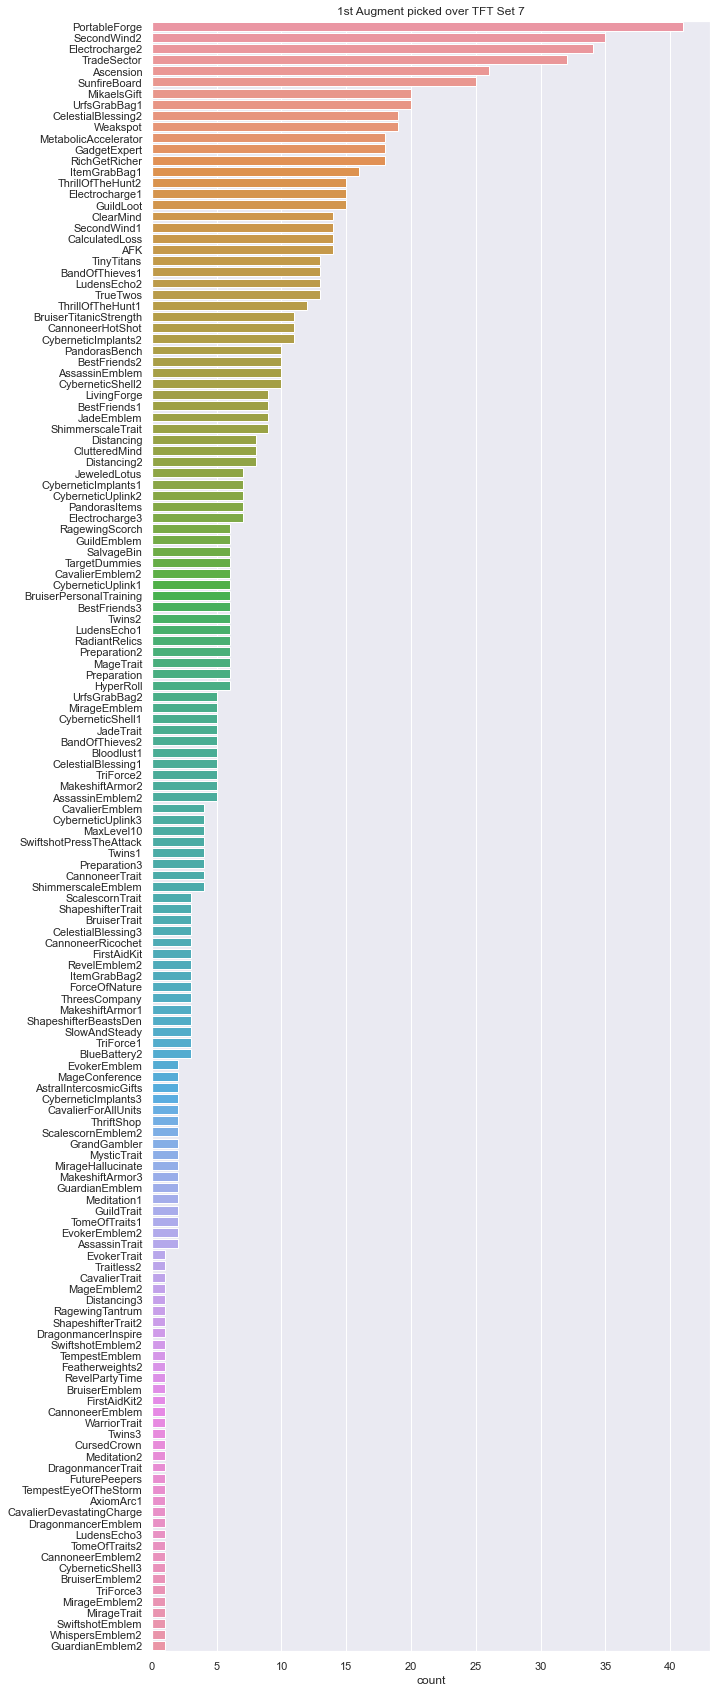

In [25]:
#distribution of the first augment chosen by rank 1 player
sns.set(rc = {'figure.figsize':(10,30)})
all_chal_augments_countplot = sns.countplot(y = all_chal_augment1, orient = "h", order = chal_separate_augment_count['augment_1'].value_counts().index).set(title = '1st Augment picked over TFT Set 7')

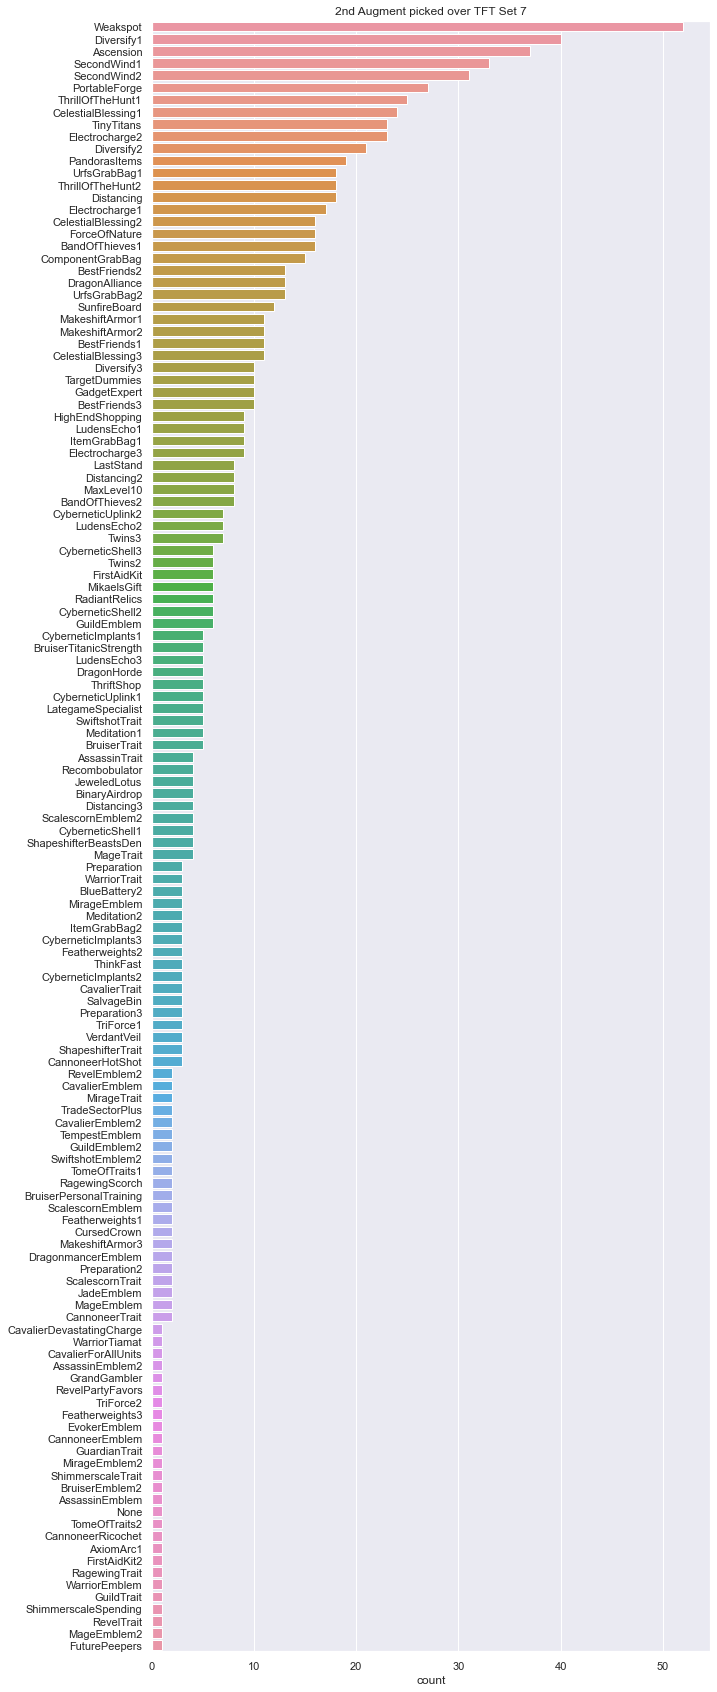

In [26]:
#distribution of the second augment chosen by rank 1 player
sns.set(rc = {'figure.figsize':(10,30)})
all_chal_augments_countplot = sns.countplot(y = all_chal_augment2, orient = "h", order = chal_separate_augment_count['augment_2'].value_counts().index).set(title = '2nd Augment picked over TFT Set 7')

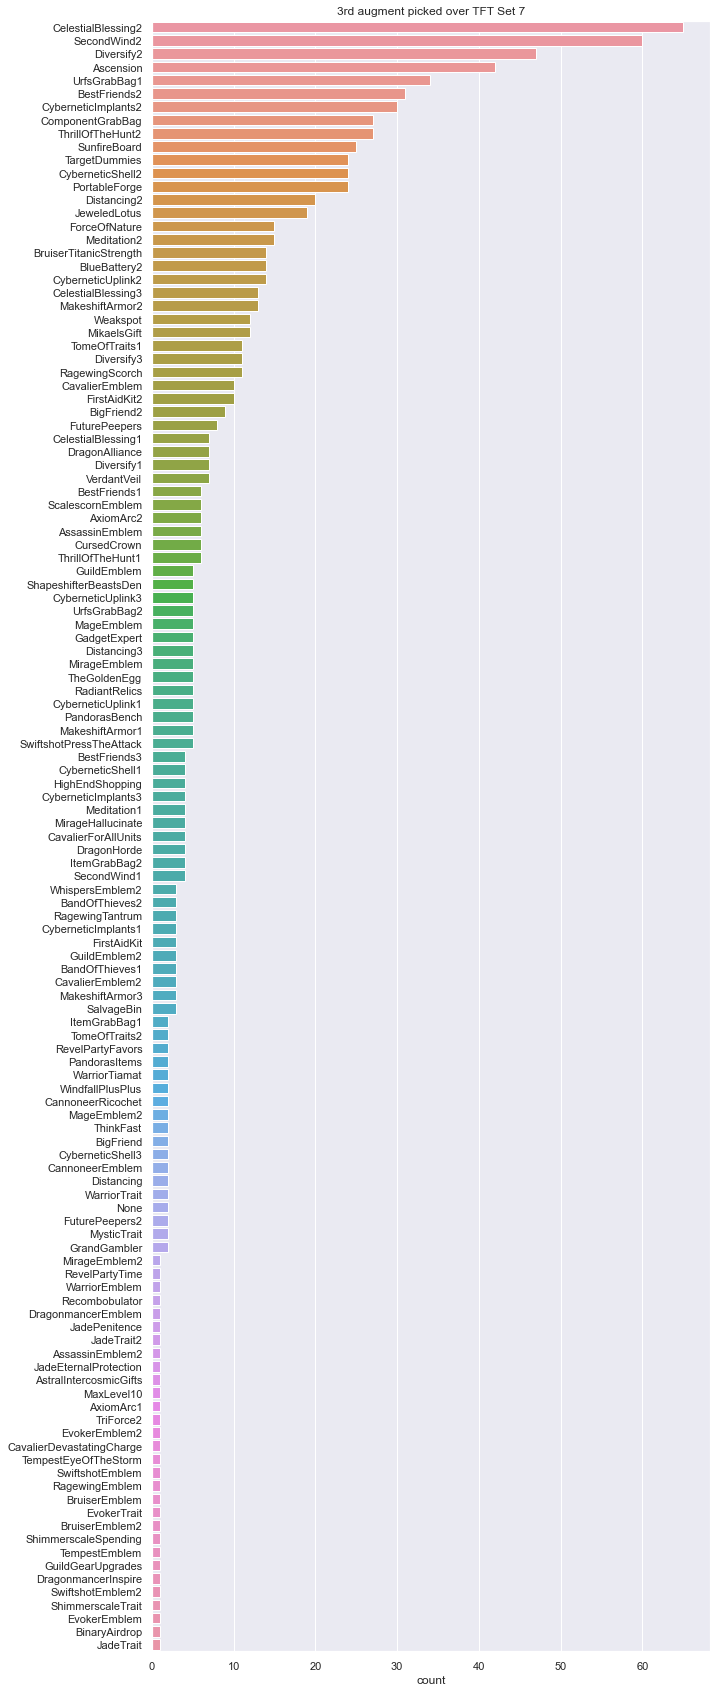

In [27]:
#distribution of the third augment chosen by rank 1 player
sns.set(rc = {'figure.figsize':(10,30)})
all_chal_augments_countplot = sns.countplot(y = all_chal_augment3, orient = "h", order = chal_separate_augment_count['augment_3'].value_counts().index).set(title = '3rd augment picked over TFT Set 7')

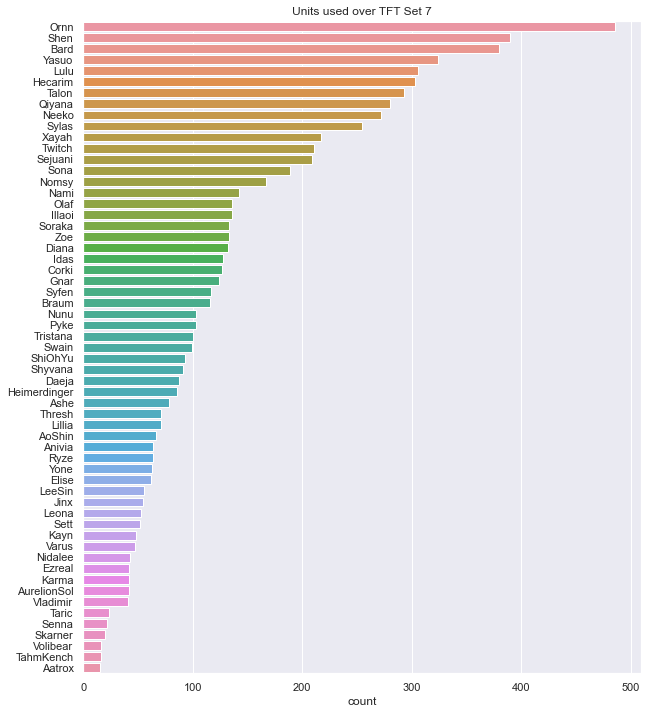

In [28]:
#distribution of units played with
all_chal_units_used =  []
for i in range(len(all_chal_matchinfo1)):
    all_chal_units_used.extend(all_chal_matchinfo1['units'][i])
units_string = ' '.join(all_chal_units_used)
units_count = pd.DataFrame(data = {'units':all_chal_units_used})

sns.set(rc = {'figure.figsize':(10,12)})
units_countplot = sns.countplot(y = all_chal_units_used, orient = "h", order = units_count['units'].value_counts().index).set(title = 'Units used over TFT Set 7')

Rank 1 Player Traits Analysis:

In [29]:
#get all unique traits names
all_traits = ['Dragon', 'Dragonmancer', 'Jade', 'Ragewing', 'Shapeshifter', 'Swiftshot', 'Bard', 'Guild', 'Tempest', 'Whispers', 'Evoker', 'Starcaller', 'Astral', 
'Bruiser', 'Mystic', 'Cannoneer', 'Revel', 'Trainer', 'Mage', 'SpellThief', 'Assassin', 'Scalescorn', 'Warrior', 'Shimmerscale', 'Mirage', 'Guardian', 'Cavalier', 'Legend']

#create empty lists to place placement values into
Dragon = []
Dragonmancer = []
Jade = []
Ragewing = []
Shapeshifter = []
Swiftshot = []
Bard = []
Guild = []
Tempest = []
Whispers = []
Evoker = []
Starcaller = []
Astral = []
Bruiser = []
Mystic = []
Cannoneer = []
Revel = []
Trainer = []
Mage = []
SpellThief = []
Assassin = []
Scalescorn = []
Warrior = []
Shimmerscale = []
Mirage = []
Guardian = []
Cavalier = []
Legend = []

#searches the trait column, sees if the trait matches any a trait in the all_traits list, appends the placement value to the empty list correlating to the trait
for i in range(len(all_chal_matchinfo1)):
    for j in all_traits:
        if j in all_chal_matchinfo1['traits'][i]:
            x = all_chal_matchinfo1['placement'][i]
            convert = eval(j)
            convert.append(x)

chal_trait_stats = pd.DataFrame(columns = ['Trait', 'Win Percentage', 'Top 4 Percentage', 'Number of Games', 'Average Placement', 'Median Placement', 'SD of Placement'])

#calculating the win percentage, top 4 percentage, number of games, average placement, median placement, and sd of placement for all traits
for j in all_traits:
    first = 0
    two_through_four = 0
    trait_convert = eval(j)
    for h in range(len(trait_convert)):
        if trait_convert[h] == 1: 
            first = first + 1
        elif trait_convert[h] == 2 or trait_convert[h] == 3 or trait_convert[h] == 4:
            two_through_four = two_through_four + 1
    chal_new_stats = [j, (first/len(trait_convert)), (first+two_through_four)/len(trait_convert), len(trait_convert), np.average(trait_convert), np.median(trait_convert), np.std(trait_convert)]
    chal_trait_stats = pd.concat([chal_trait_stats, pd.DataFrame([chal_new_stats], columns = ['Trait', 'Win Percentage', 'Top 4 Percentage', 'Number of Games', 'Average Placement', 'Median Placement', 'SD of Placement'])])

chal_trait_stats = chal_trait_stats.sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage'])
display(chal_trait_stats.round(decimals = 2))

,Trait,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,Starcaller,0.28,0.78,132,3.05,3.0,1.98
0,SpellThief,0.32,0.69,125,3.13,2.0,2.17
0,Bard,0.29,0.72,377,3.21,3.0,2.10
0,Mirage,0.24,0.70,139,3.45,3.0,2.12
0,Mystic,0.22,0.68,294,3.58,3.0,2.15
0,Warrior,0.23,0.65,248,3.69,3.0,2.25
0,Jade,0.18,0.64,173,3.72,3.0,2.10
0,Guild,0.21,0.64,683,3.73,3.0,2.23
0,Tempest,0.22,0.63,390,3.74,3.0,2.29
0,Mage,0.22,0.61,153,3.75,3.0,2.26


(0.0, 800.0)

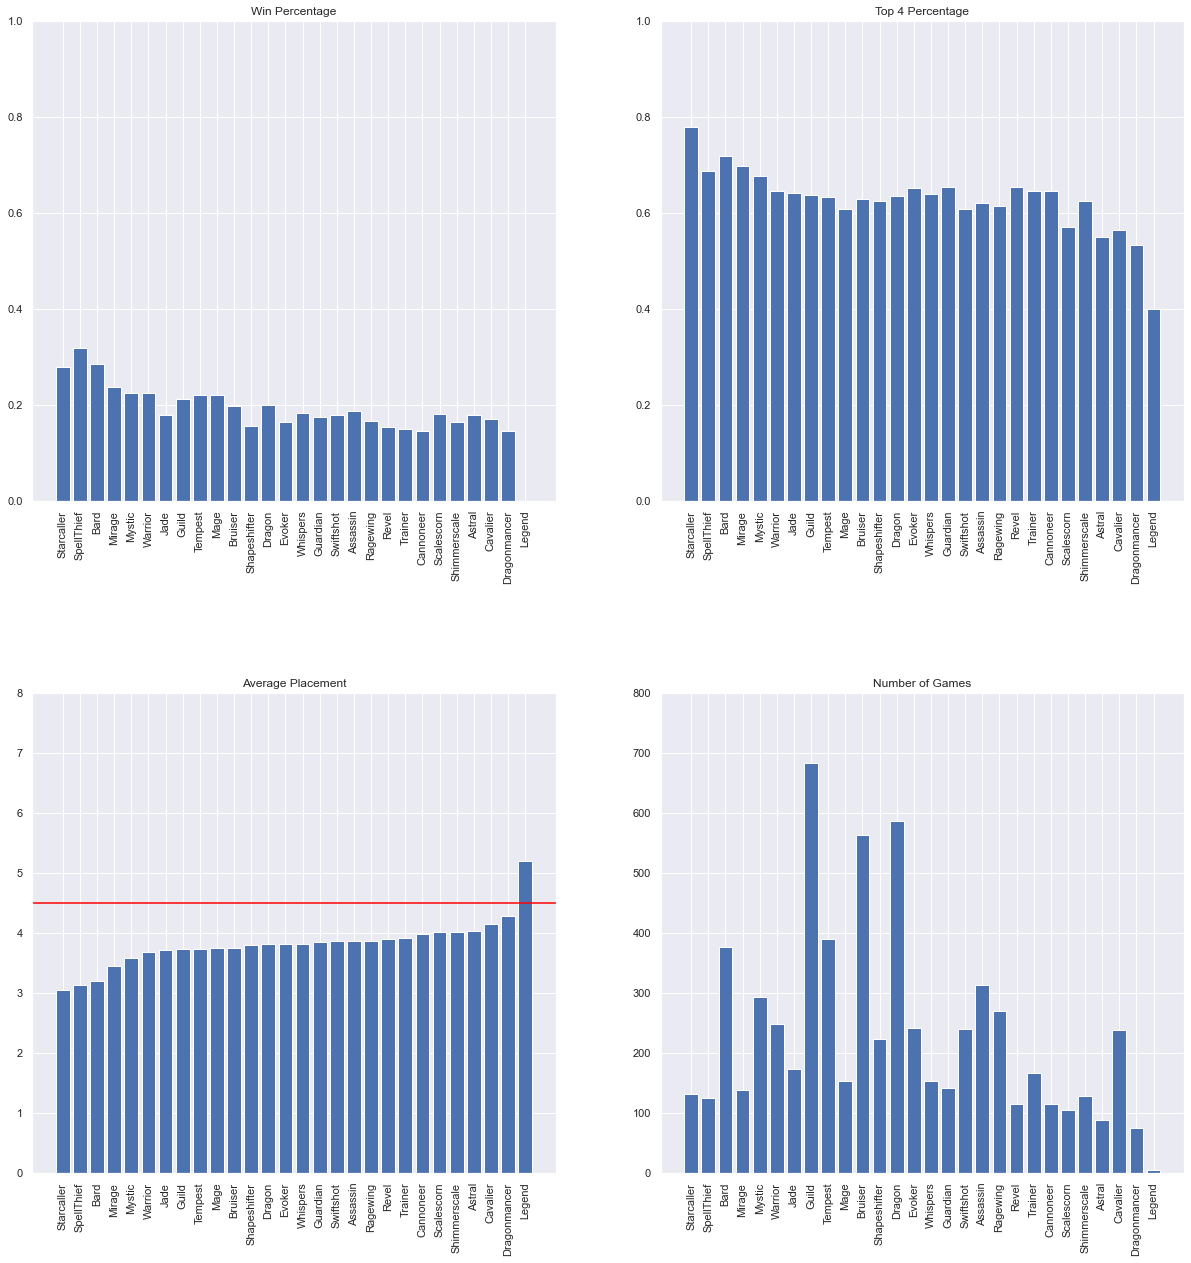

In [30]:
#create bar graphs for win percentage, top 4 percentage, average placement, number of games for rank 1 player data
plt.figure(figsize = (20,20))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.subplot(2,2,1)
plt.title('Win Percentage')
plt.bar(x = 'Trait', height = 'Win Percentage', data = chal_trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)

plt.subplot(2,2,2)
plt.title('Top 4 Percentage')
plt.bar(x = 'Trait', height = 'Top 4 Percentage', data = chal_trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)


plt.subplot(2,2,3)
plt.title('Average Placement')
plt.bar(x = 'Trait', height = 'Average Placement', data = chal_trait_stats)
plt.axhline(y = 4.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0,8)

plt.subplot(2,2,4)
plt.title('Number of Games')
plt.bar(x = 'Trait', height = 'Number of Games', data = chal_trait_stats)
plt.xticks(rotation = 90)
plt.ylim(0,800)

In [177]:
#create empty lists to append values into
all_combo_names = []
all_combo_placements = []
all_win_percentages = []
all_top4_percentages = []
all_combo_lengths = []
all_avg_placements = []
all_median_placements = []
all_SD_placements = []

#iterate through all combinations of 3 unique traits, for each iteration go through all rows of dataframe to see if those three traits were used together in the same game, if yes, save the placement into combo_placement
#calculate stats for each combination and append onto empty lists to save the data
for comb in itertools.combinations(all_traits, 3):
    all_combo_names.append(comb)
    combo_placements = []
    first = 0
    two_through_four = 0
    for k in range(len(all_chal_matchinfo1)):
        if all(elem in all_chal_matchinfo1['traits'][k] for elem in comb):
            combo_placements.append(all_chal_matchinfo1['placement'][k])
    all_combo_placements.append(combo_placements)
    for i in range(len(combo_placements)):
        if combo_placements[i] == 1:
            first = first + 1
        elif combo_placements[i] == 2 or combo_placements[i] == 3 or combo_placements[i] == 4:
            two_through_four = two_through_four + 1
    if len(combo_placements) > 0:
        all_win_percentages.append(first/len(combo_placements))
        all_top4_percentages.append((first+two_through_four)/len(combo_placements))
        all_combo_lengths.append(len(combo_placements))
        all_avg_placements.append(np.average(combo_placements))
        all_median_placements.append(np.median(combo_placements))
        all_SD_placements.append(np.std(combo_placements))
    else:
        all_win_percentages.append('NaN')
        all_top4_percentages.append('NaN')
        all_combo_lengths.append('NaN')
        all_avg_placements.append('NaN')
        all_median_placements.append('NaN')
        all_SD_placements.append('NaN')

#create dataframe for the stats created
chal_combo_trait_stats = pd.DataFrame(data = {'Trait Combination':all_combo_names, 'Placements':all_combo_placements, 
'Win Percentage': all_win_percentages, 'Top 4 Percentage': all_top4_percentages, 'Number of Games': all_combo_lengths,
'Average Placement': all_avg_placements, 'Median Placement': all_median_placements, 'SD of Placement': all_SD_placements})

#sort and clean data, delete all rows where the combination was not used in any of the games, only keep rows where number of games is greater than 25 to ensure no outliers can skew results
chal_combo_trait_stats = chal_combo_trait_stats[chal_combo_trait_stats['Average Placement'] != "NaN"]
chal_combo_trait_stats = chal_combo_trait_stats[chal_combo_trait_stats['Number of Games'] > 25].sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage']).drop(columns = ['Placements']).reset_index(drop = True)

display(chal_combo_trait_stats.round(decimals = 2).head(30))

,Trait Combination,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,"(Bard, Tempest, SpellThief)",0.666667,0.925926,27,1.703704,1.0,1.460969
1,"(Tempest, Bruiser, SpellThief)",0.533333,0.933333,30,1.833333,1.0,1.24052
2,"(Guild, Tempest, Starcaller)",0.5,0.923077,26,1.923077,1.5,1.298611
3,"(Dragon, Tempest, SpellThief)",0.580645,0.870968,31,2.032258,1.0,1.750279
4,"(Guild, Tempest, SpellThief)",0.612903,0.870968,31,2.096774,1.0,1.92362
5,"(Tempest, Mage, SpellThief)",0.533333,0.866667,30,2.133333,1.0,1.783878
6,"(Guild, Tempest, Mage)",0.533333,0.866667,30,2.266667,1.0,1.878534
7,"(Dragon, Bard, Assassin)",0.538462,0.846154,26,2.269231,1.0,1.676941
8,"(Tempest, Bruiser, Mage)",0.457143,0.857143,35,2.314286,2.0,1.703298
9,"(Bard, Bruiser, SpellThief)",0.45,0.816667,60,2.366667,2.0,1.843608


Rank 1 Player Augment Analysis:

In [32]:
#list all unique augments in a single list
chal_aug_unique = list(set(all_chal_matchinfo1['augment_1'].to_list() + all_chal_matchinfo1['augment_2'].to_list() + all_chal_matchinfo1['augment_3'].to_list()))

#create empty lists to append outputs into
all_aug_names = []
all_aug_placements = []
aug_win_percentages = []
aug_top4_percentages = []
all_aug_lengths = []
aug_avg_placements = []
aug_median_placements = []
aug_SD_placements = []

#iterates through each augment in aug_unique, at each row in database it checks to see if the augment is the augment 1, augment 2, and augment 3 columns
#if it is, it saves the placement value, repeats through entire table and saves it as a list in aug_placement, list is then appended onto all_aug_placements and reset for the next augment
#calculate stats for each augment and append onto empty lists to save the data
for j in chal_aug_unique:
    all_aug_names.append(j)
    aug_placement = []
    first = 0
    two_through_four = 0
    for i in range(len(all_chal_matchinfo1)):
        if j in all_chal_matchinfo1['augment_1'][i]:
            aug_placement.append(all_chal_matchinfo1['placement'][i])
        if j in all_chal_matchinfo1['augment_2'][i]:
            aug_placement.append(all_chal_matchinfo1['placement'][i])
        if j in all_chal_matchinfo1['augment_3'][i]:
            aug_placement.append(all_chal_matchinfo1['placement'][i])
    all_aug_placements.append(aug_placement)

    for k in range(len(aug_placement)):
        if aug_placement[k] == 1:
            first = first + 1
        elif aug_placement[k] == 2 or aug_placement[k] == 3 or aug_placement[k] == 4:
            two_through_four = two_through_four + 1
    if len(aug_placement) > 0:
        aug_win_percentages.append(first/len(aug_placement))
        aug_top4_percentages.append((first+two_through_four)/len(aug_placement))
        all_aug_lengths.append(len(aug_placement))
        aug_avg_placements.append(np.average(aug_placement))
        aug_median_placements.append(np.median(aug_placement))
        aug_SD_placements.append(np.std(aug_placement))
    else:
        aug_win_percentages.append('NaN')
        aug_top4_percentages.append('NaN')
        all_aug_lengths.append('NaN')
        aug_avg_placements.append('NaN')
        aug_median_placements.append('NaN')
        aug_SD_placements.append('NaN')

#create dataframe for augment stats
chal_aug_stats = pd.DataFrame(data = {'Augment':all_aug_names, 'Placements':all_aug_placements, 
'Win Percentage': aug_win_percentages, 'Top 4 Percentage': aug_top4_percentages, 'Number of Games': all_aug_lengths,
'Average Placement': aug_avg_placements, 'Median Placement': aug_median_placements, 'SD of Placement': aug_SD_placements})

#sort and clean data, delete all rows where the augment was not used in any of the games, only keep rows where number of games is greater than 20 to ensure no outliers can skew results
chal_aug_stats = chal_aug_stats[chal_aug_stats['Average Placement'] != "NaN"]
chal_aug_stats = chal_aug_stats[chal_aug_stats['Number of Games'] > 20].sort_values(by = ['Average Placement', 'Top 4 Percentage', 'Win Percentage']).drop(columns = ['Placements']).reset_index(drop = True)


display(chal_aug_stats.round(decimals = 2))


,Augment,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,AssassinEmblem,0.33,0.83,24,3.00,2.5,2.06
1,MakeshiftArmor2,0.24,0.72,29,3.21,3.0,2.06
2,CelestialBlessing3,0.15,0.74,27,3.22,2.0,1.97
3,GadgetExpert,0.30,0.79,33,3.27,3.0,2.19
4,BruiserTitanicStrength,0.20,0.70,30,3.33,3.5,1.80
5,Distancing2,0.36,0.69,36,3.39,3.0,2.43
6,Diversify2,0.26,0.68,68,3.40,3.0,2.14
7,TargetDummies,0.25,0.70,40,3.40,3.0,2.23
8,BestFriends1,0.31,0.69,26,3.46,3.0,2.26
9,CyberneticImplants2,0.23,0.68,44,3.50,3.0,2.09


(0.0, 140.0)

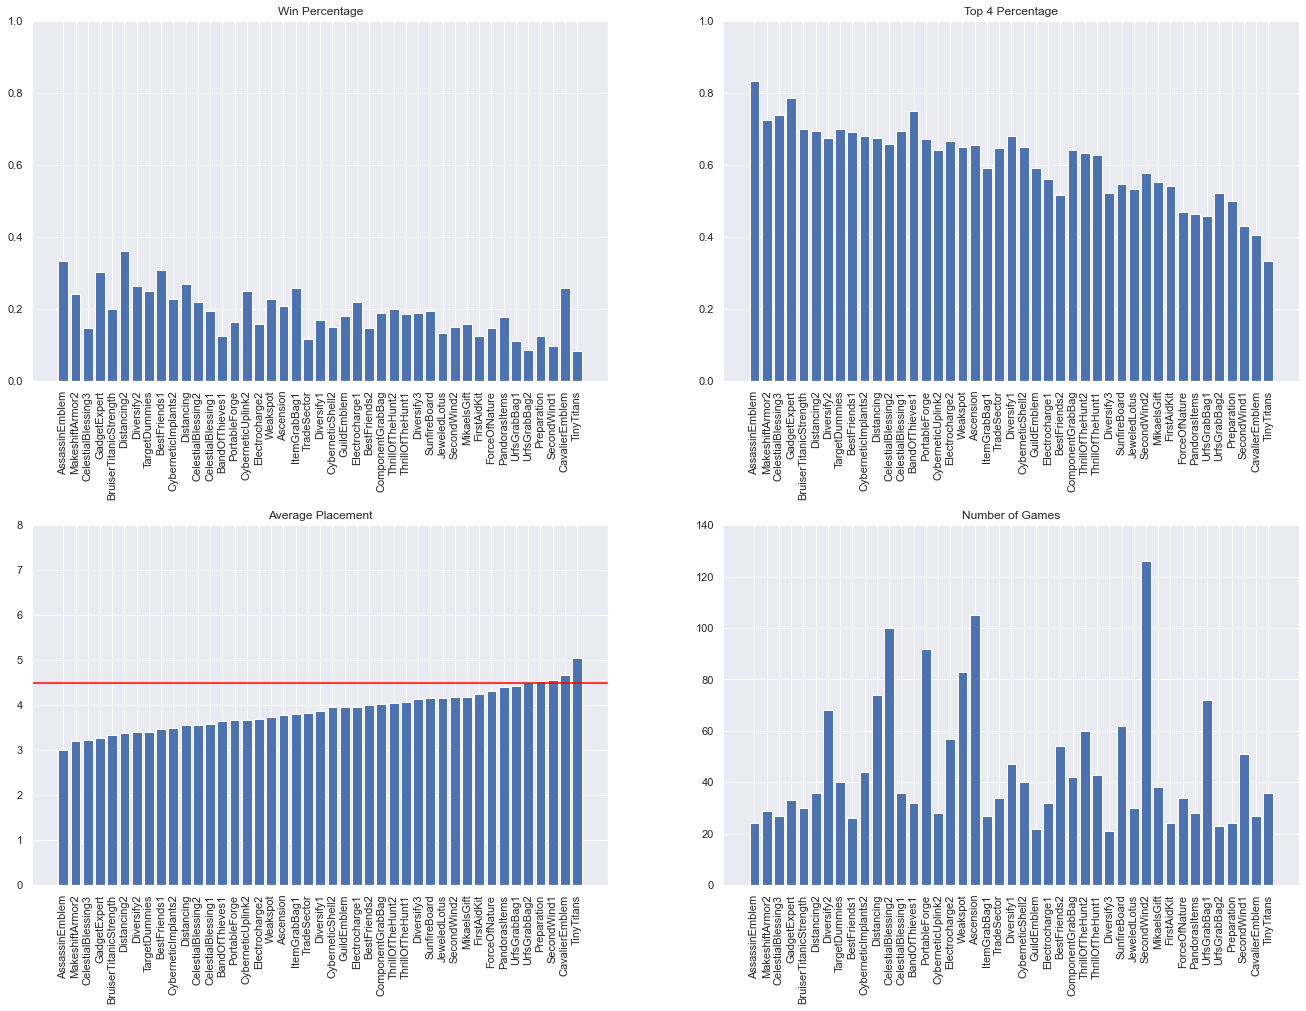

In [33]:
#bar graphs of rank 1 player augment win percentage, top 4 percentage, number of games, and average placement
plt.figure(figsize = (22,15))

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

plt.subplot(2,2,1)
plt.title('Win Percentage')
plt.bar(x = 'Augment', height = 'Win Percentage', data = chal_aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)

plt.subplot(2,2,2)
plt.title('Top 4 Percentage')
plt.bar(x = 'Augment', height = 'Top 4 Percentage', data = chal_aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,1)


plt.subplot(2,2,3)
plt.title('Average Placement')
plt.bar(x = 'Augment', height = 'Average Placement', data = chal_aug_stats)
plt.axhline(y = 4.5, color = 'red')
plt.xticks(rotation = 90)
plt.ylim(0,8)

plt.subplot(2,2,4)
plt.title('Number of Games')
plt.bar(x = 'Augment', height = 'Number of Games', data = chal_aug_stats)
plt.xticks(rotation = 90)
plt.ylim(0,140)

Comparative Analysis:

In [138]:
#make dataframe of all trait distributions, both my own and rank 1 players, use value counts and to frame to calculate it
personal_comp_trait_dist = pd.DataFrame(data = {'Trait': personal_all_traits_used, 'Player': ['Personal'] * 1183}).value_counts().to_frame('Distribution')
rank1_comp_trait_dist = pd.DataFrame(data = {'Trait': all_traits_used, 'Player': ['Rank 1'] * 6489}).value_counts().to_frame('Distribution')
comp_trait_dist = pd.concat([personal_comp_trait_dist/197, rank1_comp_trait_dist/961]).reset_index()
comp_trait_dist

,Trait,Player,Distribution
0,Dragon,Personal,0.604061
1,Guild,Personal,0.568528
2,Bruiser,Personal,0.451777
3,Jade,Personal,0.370558
4,Shapeshifter,Personal,0.340102
5,Bard,Personal,0.309645
6,Mystic,Personal,0.253807
7,Whispers,Personal,0.248731
8,Tempest,Personal,0.248731
9,Dragonmancer,Personal,0.243655


Text(0.5, 1.0, 'Comparison of Trait Usage Distribution')

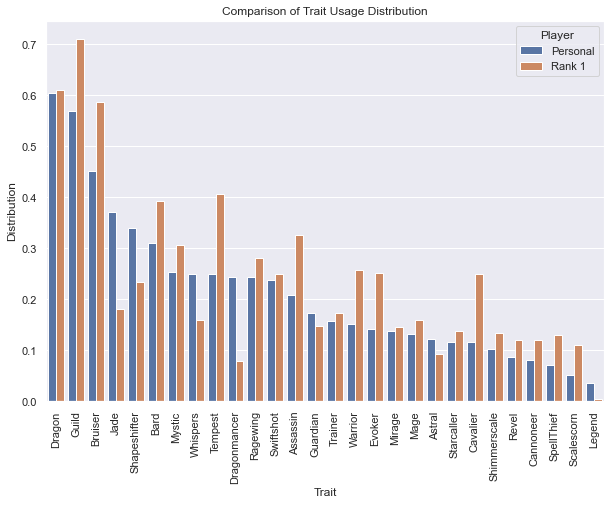

In [173]:
ax = sns.barplot(x = 'Trait', y = 'Distribution', hue = 'Player', data = comp_trait_dist)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Comparison of Trait Usage Distribution')


In [140]:
chal_trait_stats

,Trait,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement
0,Starcaller,0.280303,0.780303,132,3.053030,3.0,1.982172
0,SpellThief,0.320000,0.688000,125,3.128000,2.0,2.172468
0,Bard,0.286472,0.718833,377,3.209549,3.0,2.098658
0,Mirage,0.237410,0.697842,139,3.446043,3.0,2.119361
0,Mystic,0.224490,0.676871,294,3.578231,3.0,2.147377
0,Warrior,0.225806,0.645161,248,3.693548,3.0,2.252874
0,Jade,0.179191,0.641618,173,3.722543,3.0,2.096904
0,Guild,0.212299,0.636896,683,3.729136,3.0,2.232756
0,Tempest,0.220513,0.633333,390,3.743590,3.0,2.288409
0,Mage,0.222222,0.607843,153,3.745098,3.0,2.259416


In [175]:
personal_legend_trait_stats = trait_stats.loc[(trait_stats['Trait'] == 'Bard')|(trait_stats['Trait'] == 'Starcaller')|(trait_stats['Trait'] == 'SpellThief')]
personal_legend_trait_stats['Player'] = ['Personal'] * 3
rank1_legend_trait_stats = chal_trait_stats.loc[(chal_trait_stats['Trait'] == 'Bard')|(chal_trait_stats['Trait'] == 'Starcaller')|(chal_trait_stats['Trait'] == 'SpellThief')]
rank1_legend_trait_stats['Player'] = ['Rank 1'] * 3
comp_trait_stats = pd.concat([personal_legend_trait_stats, rank1_legend_trait_stats]).reset_index()
comp_trait_stats

,index,Trait,Win Percentage,Top 4 Percentage,Number of Games,Average Placement,Median Placement,SD of Placement,Player
0,0,Bard,0.131148,0.655738,61,3.737705,4.0,2.055793,Personal
1,0,Starcaller,0.086957,0.652174,23,4.000000,4.0,2.245769,Personal
2,0,SpellThief,0.000000,0.285714,14,5.500000,5.0,1.841971,Personal
3,0,Starcaller,0.280303,0.780303,132,3.053030,3.0,1.982172,Rank 1
4,0,SpellThief,0.320000,0.688000,125,3.128000,2.0,2.172468,Rank 1
5,0,Bard,0.286472,0.718833,377,3.209549,3.0,2.098658,Rank 1


[Text(0, 0, 'Dragon'),
 Text(1, 0, 'Guild'),
 Text(2, 0, 'Bruiser'),
 Text(3, 0, 'Jade'),
 Text(4, 0, 'Shapeshifter'),
 Text(5, 0, 'Bard'),
 Text(6, 0, 'Mystic'),
 Text(7, 0, 'Whispers'),
 Text(8, 0, 'Tempest'),
 Text(9, 0, 'Dragonmancer'),
 Text(10, 0, 'Ragewing'),
 Text(11, 0, 'Swiftshot'),
 Text(12, 0, 'Assassin'),
 Text(13, 0, 'Guardian'),
 Text(14, 0, 'Trainer'),
 Text(15, 0, 'Warrior'),
 Text(16, 0, 'Evoker'),
 Text(17, 0, 'Mirage'),
 Text(18, 0, 'Mage'),
 Text(19, 0, 'Astral'),
 Text(20, 0, 'Starcaller'),
 Text(21, 0, 'Cavalier'),
 Text(22, 0, 'Shimmerscale'),
 Text(23, 0, 'Revel'),
 Text(24, 0, 'Cannoneer'),
 Text(25, 0, 'SpellThief'),
 Text(26, 0, 'Scalescorn'),
 Text(27, 0, 'Legend')]

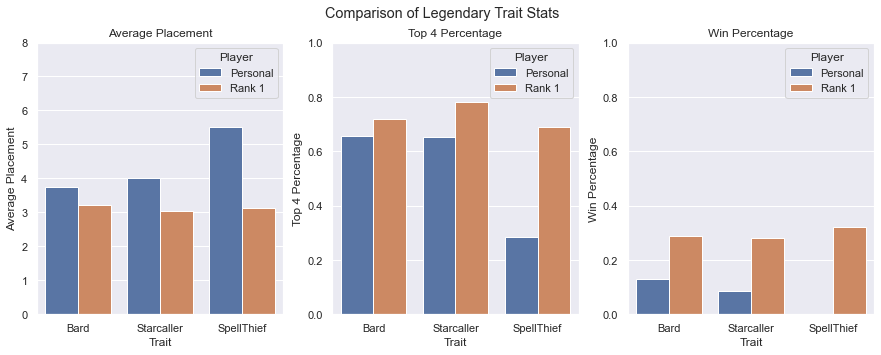

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)
fig.suptitle('Comparison of Legendary Trait Stats')

sns.barplot(ax = axes[0], x = 'Trait', y = 'Average Placement', hue = 'Player', data = comp_trait_stats)
axes[0].set_title("Average Placement")
axes[0].set_ylim(0,8)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

sns.barplot(ax = axes[1], x = 'Trait', y = 'Top 4 Percentage', hue = 'Player', data = comp_trait_stats)
axes[1].set_title('Top 4 Percentage')
axes[1].set_ylim(0,1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

sns.barplot(ax = axes[2], x = 'Trait', y = 'Win Percentage', hue = 'Player', data = comp_trait_stats)
axes[2].set_title('Win Percentage')
axes[2].set_ylim(0,1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)